In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import train
import pickle
import tensorflow as tf


In [7]:
dfList = train.transform()
#df.shape

In [3]:
df1List = dfList
dfList = df1List
for df in dfList:
    scaler = MinMaxScaler(feature_range=(0,1)).fit(df)
    df = scaler.transform(df)
#print(dfList[12])
#df.head(5)

In [4]:
def eval(accList, precisionList, tprList, farList, frrList, y, y_pred):
    avgaccuracy = 0
    avgPrecision = 0
    avgTpr = 0
    avgFar = 0
    avgFrr = 0
    for i in range(len(accList)):
        avgaccuracy += accList[i]
        avgPrecision += precisionList[i]
        avgTpr += tprList[i]
        avgFar += farList[i]
        avgFrr += frrList[i]
    avgaccuracy = avgaccuracy / len(accList)
    avgPrecision = avgPrecision / len(precisionList)
    avgTpr = avgTpr / len(tprList)
    avgFar = avgFar / len(farList)
    avgFrr = avgFrr / len(frrList)
    
    fprROC, tprROC, threshold = roc_curve(y, y_pred, pos_label=1) #fprROC == avgFar, tprROC == avgTpr
    fnrROC = 1 - tprROC #fnrROC == avgFrr
    EER = fprROC[np.nanargmin(np.absolute((fnrROC - fprROC)))]

    print("average acc = "+str(avgaccuracy))
    print("average precision = "+str(avgPrecision))
    print("average TPR = "+str(avgTpr))
    print("average FAR = "+str(avgFar))
    print("average FRR = "+str(avgFrr))
    print("average EER = "+str(EER))

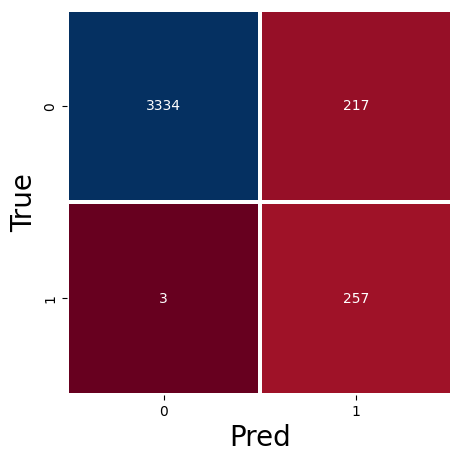

acc = 0.9422723694568355
precision = 0.5421940928270043
TPR = 0.9884615384615385
FAR = 0.061109546606589696
FRR = 0.011538461538461539


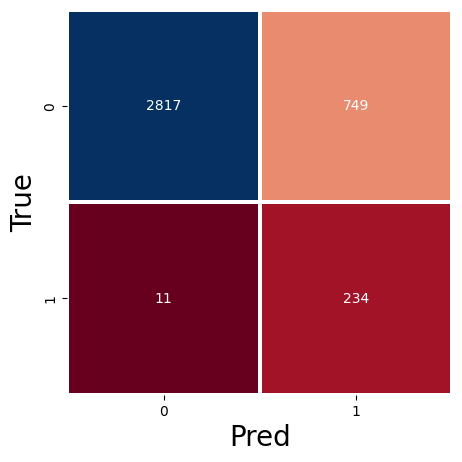

acc = 0.8005772763054316
precision = 0.2380467955239064
TPR = 0.9551020408163265
FAR = 0.21003925967470555
FRR = 0.044897959183673466


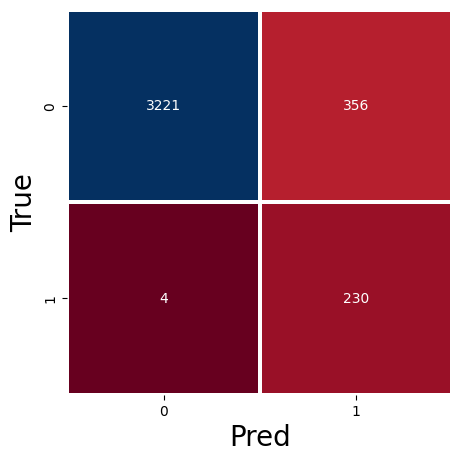

acc = 0.9055366045657308
precision = 0.3924914675767918
TPR = 0.9829059829059829
FAR = 0.09952474140341068
FRR = 0.017094017094017096


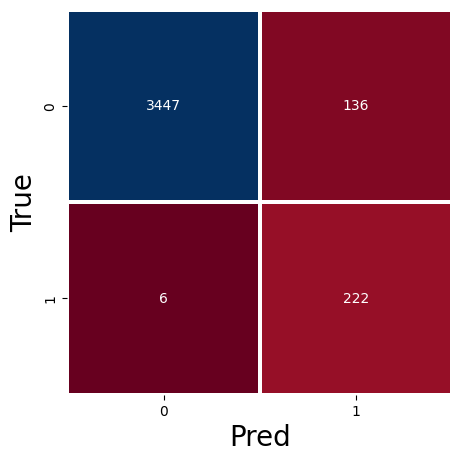

acc = 0.9627394384675938
precision = 0.6201117318435754
TPR = 0.9736842105263158
FAR = 0.037957019257605355
FRR = 0.02631578947368421


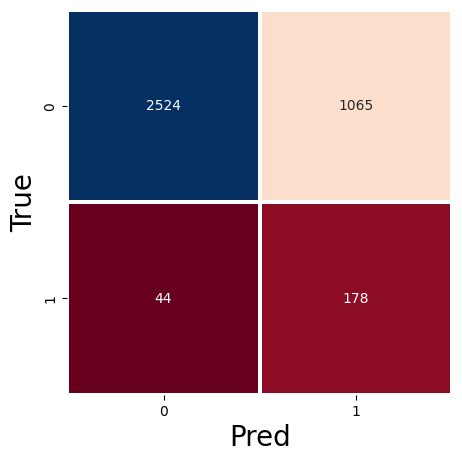

acc = 0.7090002623983207
precision = 0.14320193081255028
TPR = 0.8018018018018018
FAR = 0.29674003900808027
FRR = 0.1981981981981982


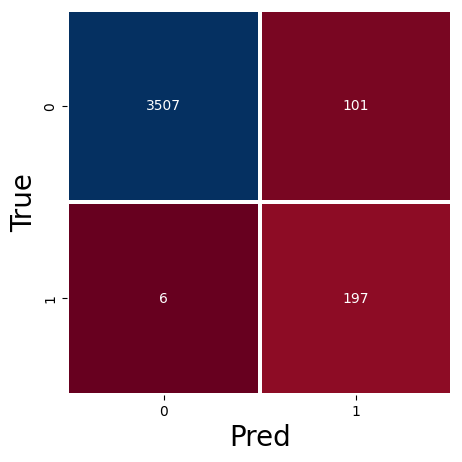

acc = 0.97192337969037
precision = 0.6610738255033557
TPR = 0.9704433497536946
FAR = 0.027993348115299334
FRR = 0.029556650246305417


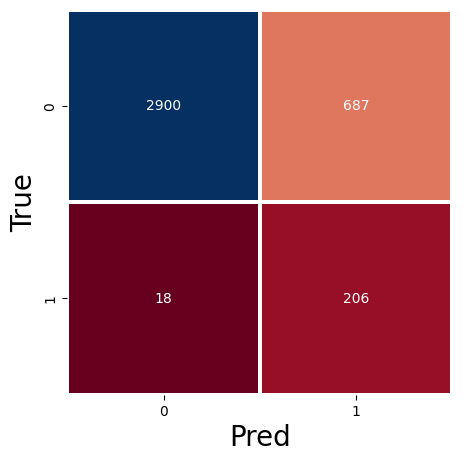

acc = 0.8150091839412228
precision = 0.23068309070548712
TPR = 0.9196428571428571
FAR = 0.19152495121271257
FRR = 0.08035714285714286


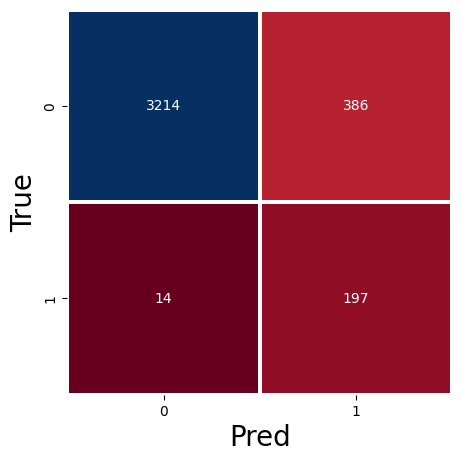

acc = 0.8950406717397008
precision = 0.3379073756432247
TPR = 0.933649289099526
FAR = 0.10722222222222222
FRR = 0.06635071090047394


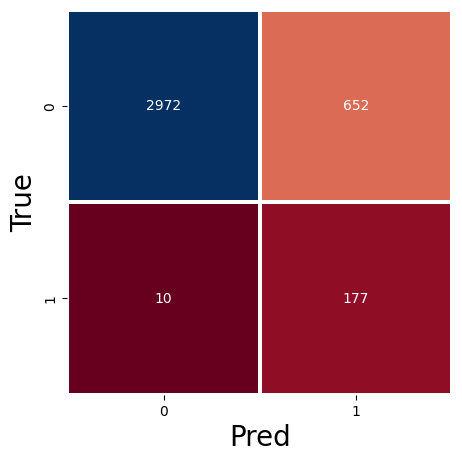

acc = 0.8262923117292049
precision = 0.2135102533172497
TPR = 0.946524064171123
FAR = 0.17991169977924945
FRR = 0.053475935828877004


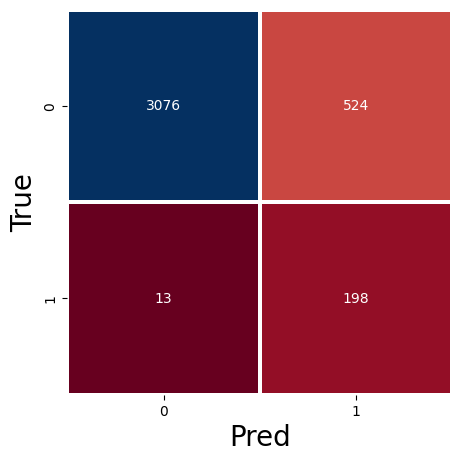

acc = 0.8590921018105484
precision = 0.2742382271468144
TPR = 0.9383886255924171
FAR = 0.14555555555555555
FRR = 0.061611374407582936


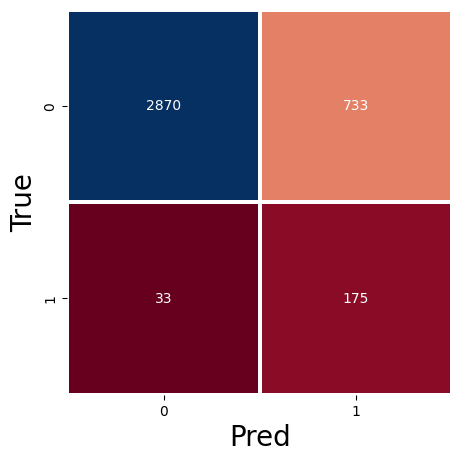

acc = 0.7990028863815272
precision = 0.19273127753303965
TPR = 0.8413461538461539
FAR = 0.20344157646405772
FRR = 0.15865384615384615


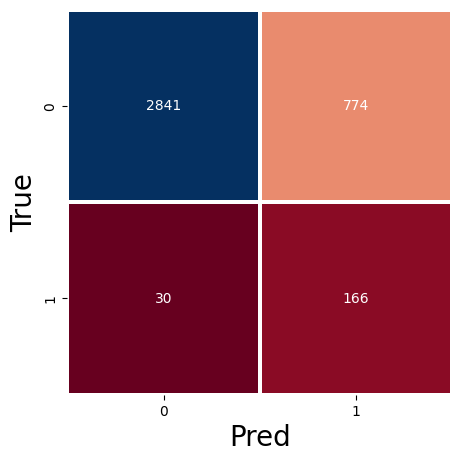

acc = 0.7890317501967987
precision = 0.17659574468085107
TPR = 0.8469387755102041
FAR = 0.21410788381742737
FRR = 0.15306122448979592


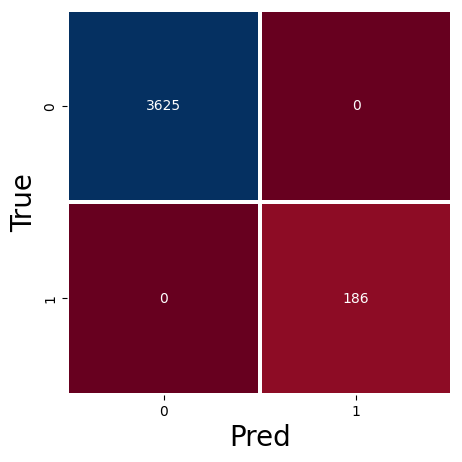

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


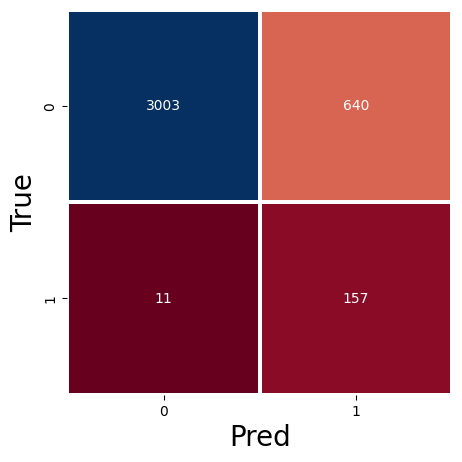

acc = 0.8291786932563632
precision = 0.19698870765370138
TPR = 0.9345238095238095
FAR = 0.17567938512215206
FRR = 0.06547619047619048


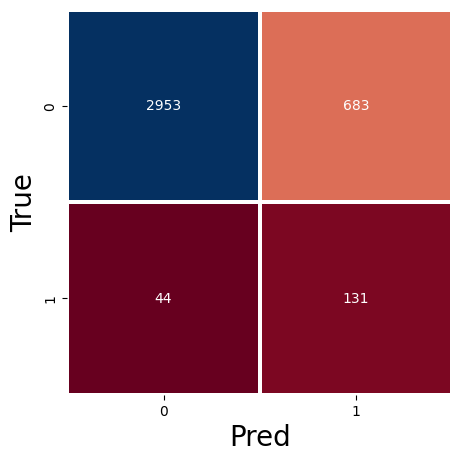

acc = 0.8092364208869063
precision = 0.16093366093366093
TPR = 0.7485714285714286
FAR = 0.18784378437843785
FRR = 0.25142857142857145


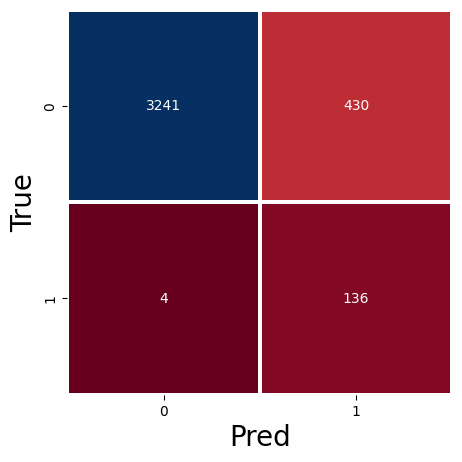

acc = 0.8861191288375755
precision = 0.24028268551236748
TPR = 0.9714285714285714
FAR = 0.11713429583219831
FRR = 0.02857142857142857


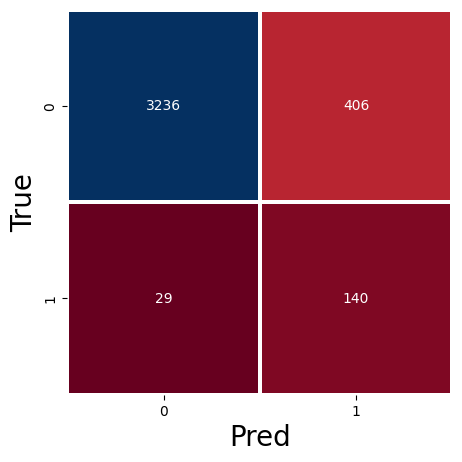

acc = 0.8858567305169247
precision = 0.2564102564102564
TPR = 0.8284023668639053
FAR = 0.11147721032399781
FRR = 0.17159763313609466


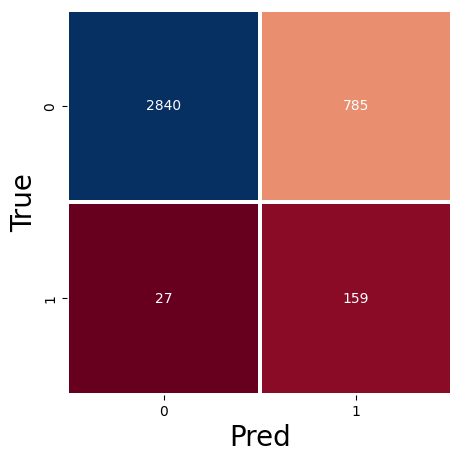

acc = 0.7869325636315928
precision = 0.1684322033898305
TPR = 0.8548387096774194
FAR = 0.21655172413793103
FRR = 0.14516129032258066


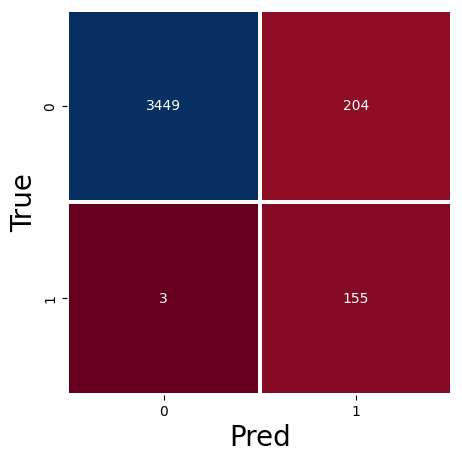

acc = 0.9456835476252952
precision = 0.43175487465181056
TPR = 0.9810126582278481
FAR = 0.055844511360525595
FRR = 0.0189873417721519
average acc = 0.8641329116546286
average precision = 0.34092569482449875
average TPR = 0.9167192754695223
average FAR = 0.13892940811958726
average FRR = 0.0832807245304777
average EER = 0.055844511360525595


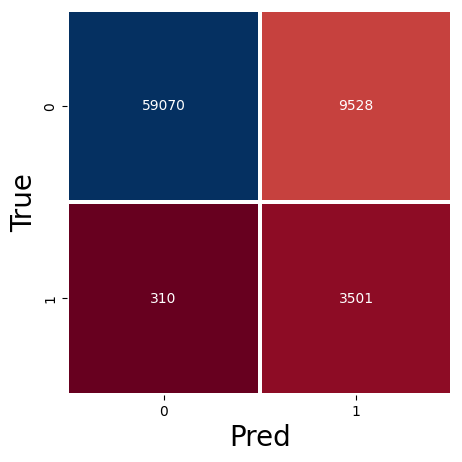

In [9]:
import pickle
#i=0
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set]
    k_fold = KFold(5, shuffle=True, random_state=42)
    
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        model = svm.SVC(kernel='rbf', C=10).fit(X_re, y_re)

        model.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = model.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


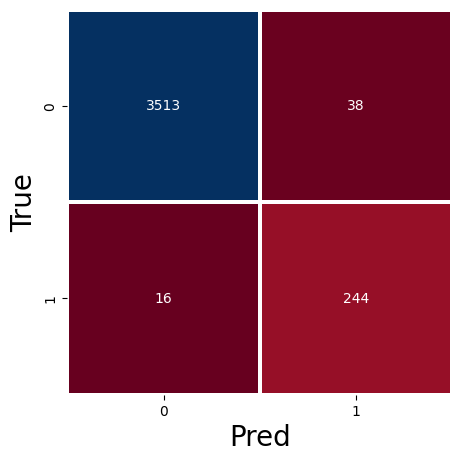

acc = 0.9858304906848596
precision = 0.8652482269503546
TPR = 0.9384615384615385
FAR = 0.010701210926499578
FRR = 0.06153846153846154


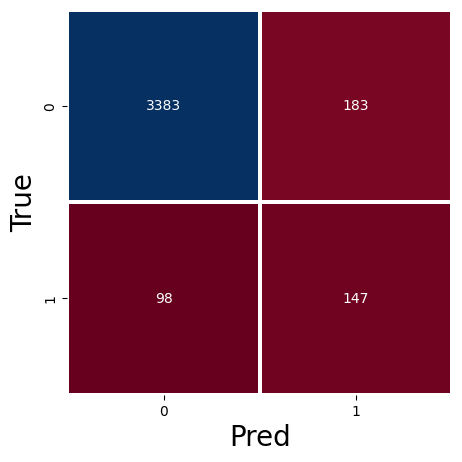

acc = 0.9262660718971398
precision = 0.44545454545454544
TPR = 0.6
FAR = 0.051318003365114974
FRR = 0.4


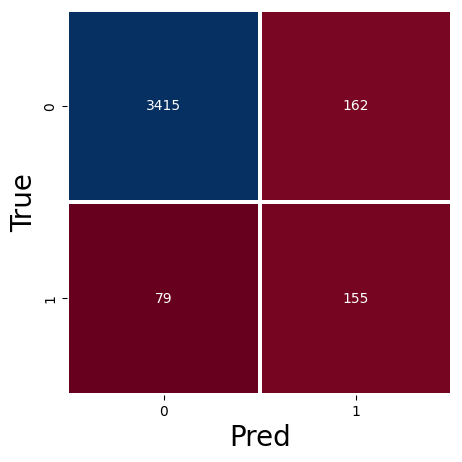

acc = 0.9367620047231697
precision = 0.4889589905362776
TPR = 0.6623931623931624
FAR = 0.04528934861615879
FRR = 0.33760683760683763


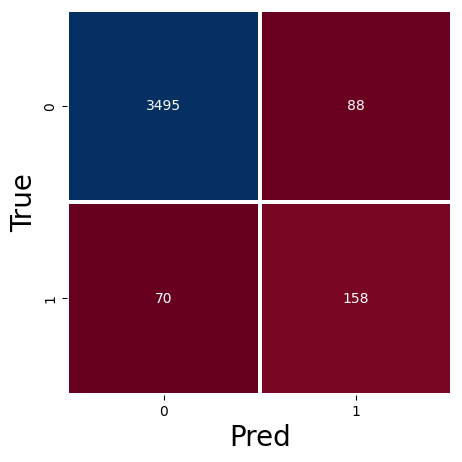

acc = 0.9585410653371819
precision = 0.6422764227642277
TPR = 0.6929824561403509
FAR = 0.024560424225509348
FRR = 0.30701754385964913


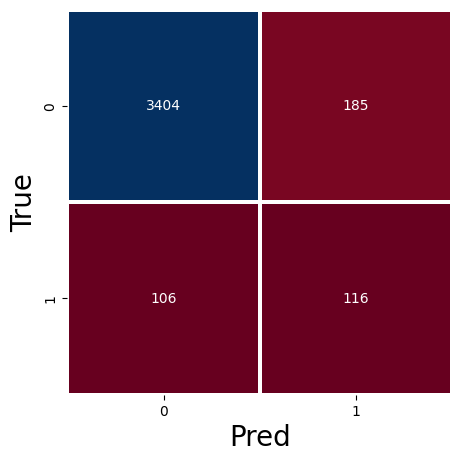

acc = 0.9236420886906324
precision = 0.3853820598006645
TPR = 0.5225225225225225
FAR = 0.05154639175257732
FRR = 0.4774774774774775


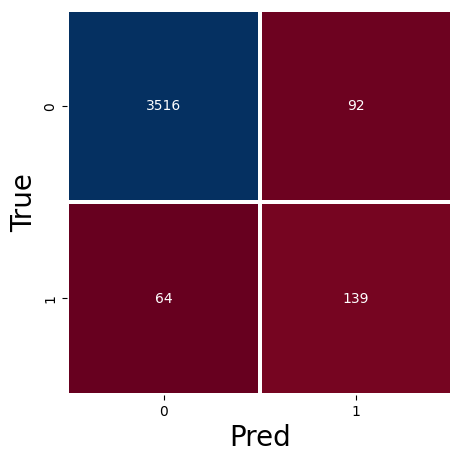

acc = 0.9590658619784833
precision = 0.6017316017316018
TPR = 0.6847290640394089
FAR = 0.025498891352549888
FRR = 0.31527093596059114


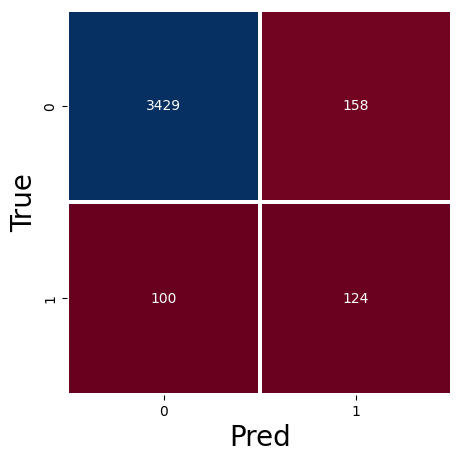

acc = 0.932301233272107
precision = 0.4397163120567376
TPR = 0.5535714285714286
FAR = 0.044047950933928076
FRR = 0.44642857142857145


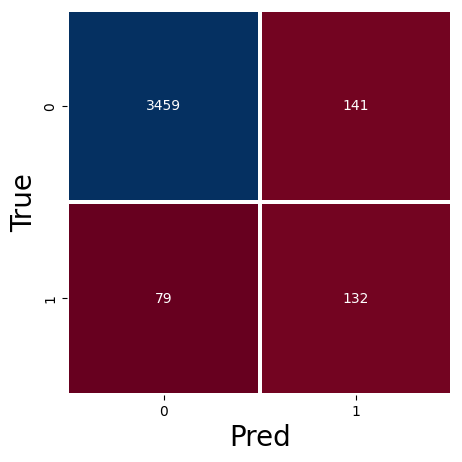

acc = 0.9422723694568355
precision = 0.4835164835164835
TPR = 0.6255924170616114
FAR = 0.03916666666666667
FRR = 0.3744075829383886


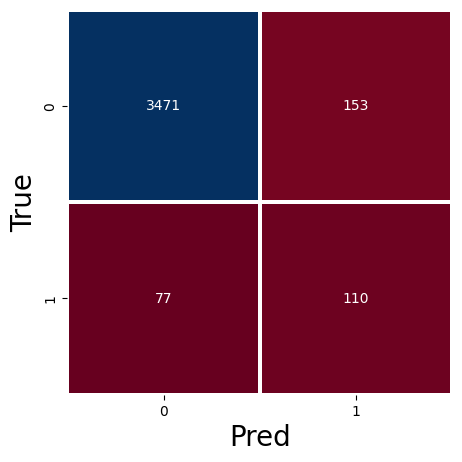

acc = 0.939648386250328
precision = 0.41825095057034223
TPR = 0.5882352941176471
FAR = 0.042218543046357616
FRR = 0.4117647058823529


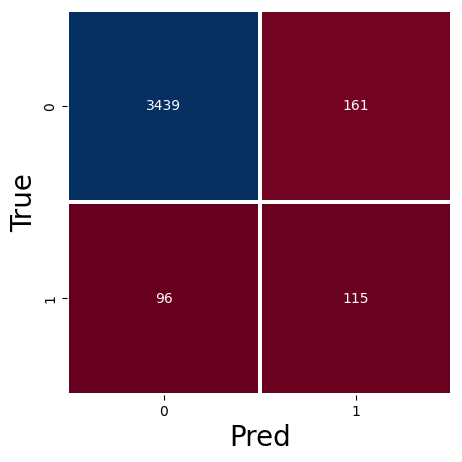

acc = 0.9325636315927578
precision = 0.4166666666666667
TPR = 0.5450236966824644
FAR = 0.04472222222222222
FRR = 0.4549763033175355


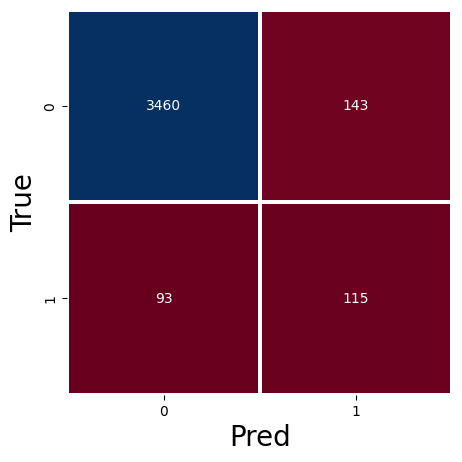

acc = 0.9380739963264235
precision = 0.44573643410852715
TPR = 0.5528846153846154
FAR = 0.03968914793227866
FRR = 0.44711538461538464


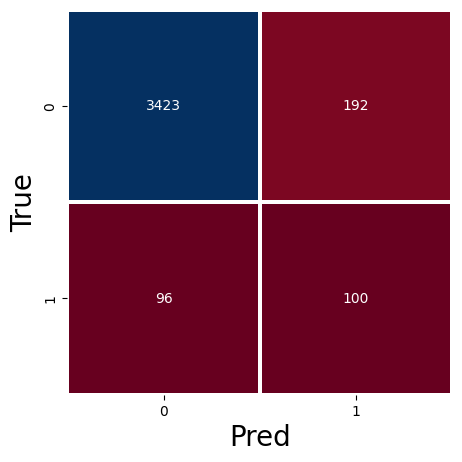

acc = 0.9244292836525846
precision = 0.3424657534246575
TPR = 0.5102040816326531
FAR = 0.053112033195020746
FRR = 0.4897959183673469


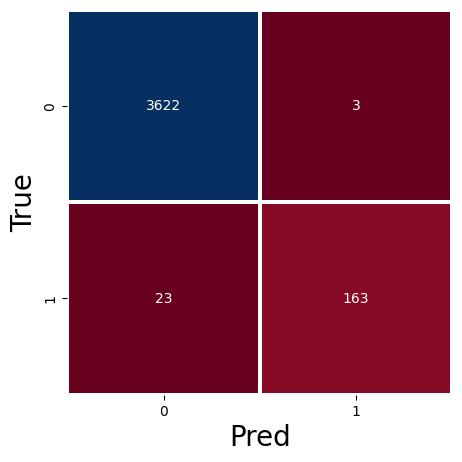

acc = 0.9931776436630806
precision = 0.9819277108433735
TPR = 0.8763440860215054
FAR = 0.0008275862068965517
FRR = 0.12365591397849462


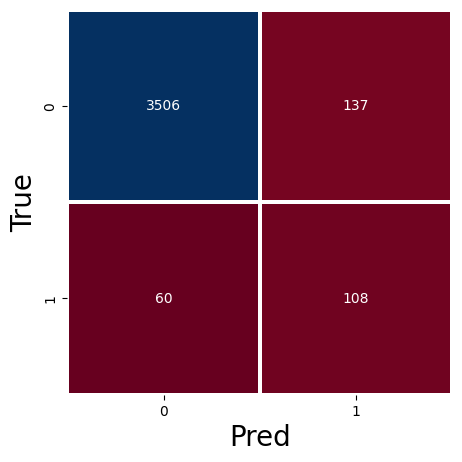

acc = 0.9483075308318026
precision = 0.44081632653061226
TPR = 0.6428571428571429
FAR = 0.037606368377710676
FRR = 0.35714285714285715


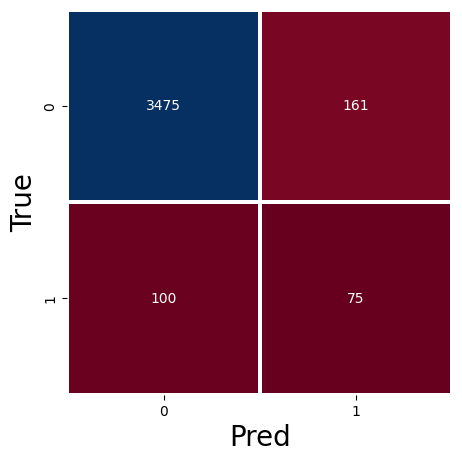

acc = 0.9315140383101548
precision = 0.3177966101694915
TPR = 0.42857142857142855
FAR = 0.044279427942794276
FRR = 0.5714285714285714


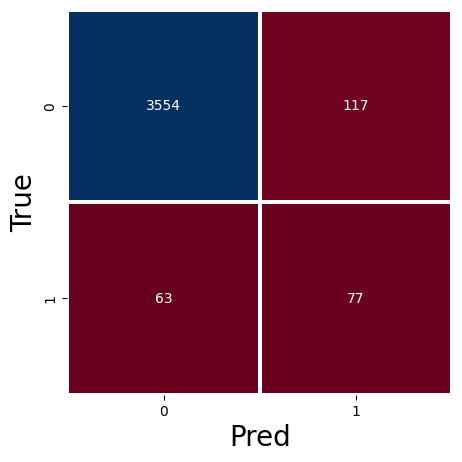

acc = 0.9527683022828654
precision = 0.39690721649484534
TPR = 0.55
FAR = 0.031871424679923724
FRR = 0.45


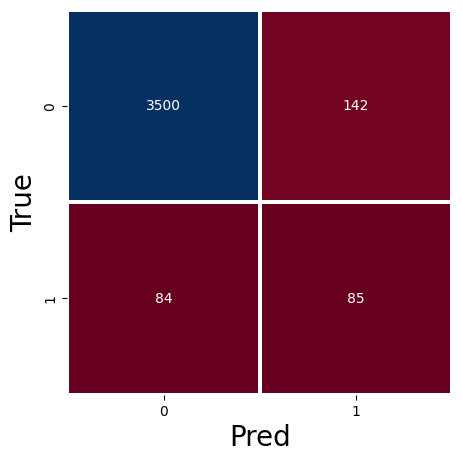

acc = 0.940697979532931
precision = 0.3744493392070485
TPR = 0.5029585798816568
FAR = 0.03898956617243273
FRR = 0.4970414201183432


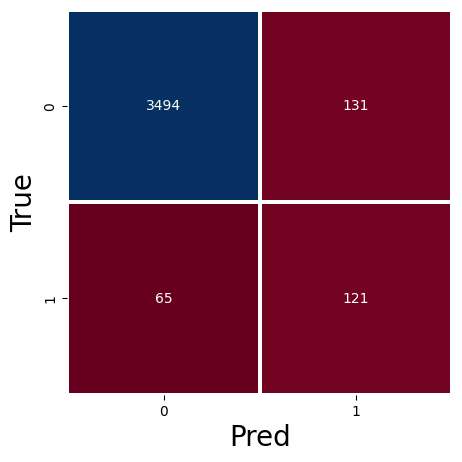

acc = 0.9485699291524534
precision = 0.4801587301587302
TPR = 0.6505376344086021
FAR = 0.03613793103448276
FRR = 0.34946236559139787


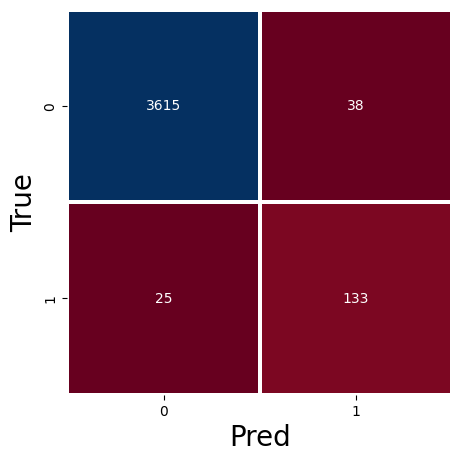

acc = 0.9834689057990029
precision = 0.7777777777777778
TPR = 0.8417721518987342
FAR = 0.010402408978921434
FRR = 0.15822784810126583
average acc = 0.9472579375491998
average precision = 0.5129072715138402
average TPR = 0.6299811210866565
average FAR = 0.03536766040147611
average FRR = 0.3700188789133435
average EER = 0.010402408978921434


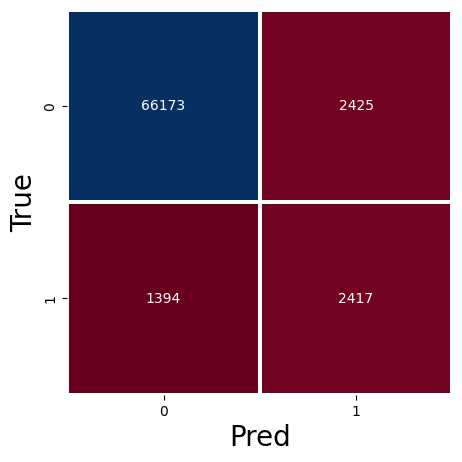

In [10]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        knn = KNeighborsClassifier(n_neighbors=2)

        knn.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = knn.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


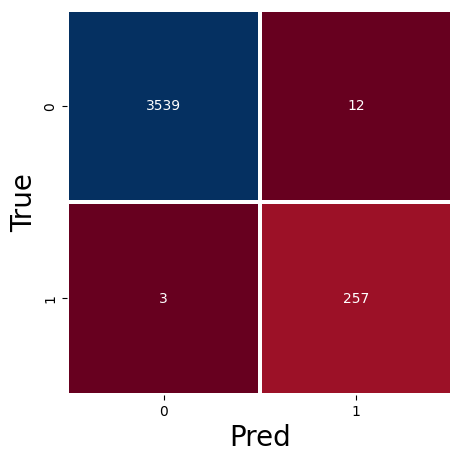

acc = 0.9960640251902387
precision = 0.9553903345724907
TPR = 0.9884615384615385
FAR = 0.0033793297662630243
FRR = 0.011538461538461539


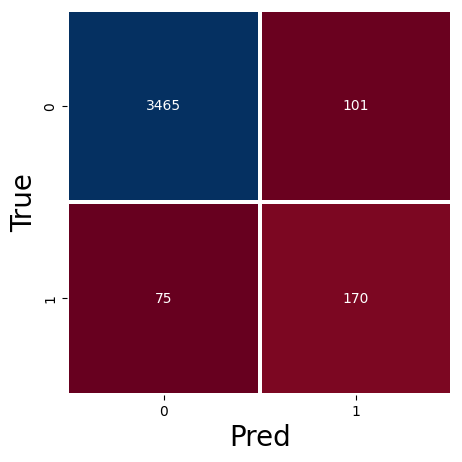

acc = 0.9538178955654684
precision = 0.6273062730627307
TPR = 0.6938775510204082
FAR = 0.028323051037577117
FRR = 0.30612244897959184


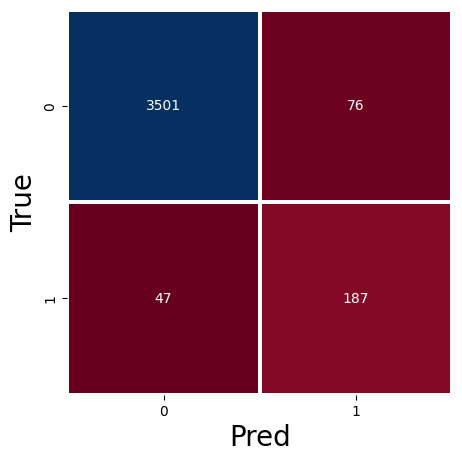

acc = 0.967725006559958
precision = 0.7110266159695817
TPR = 0.7991452991452992
FAR = 0.0212468549063461
FRR = 0.20085470085470086


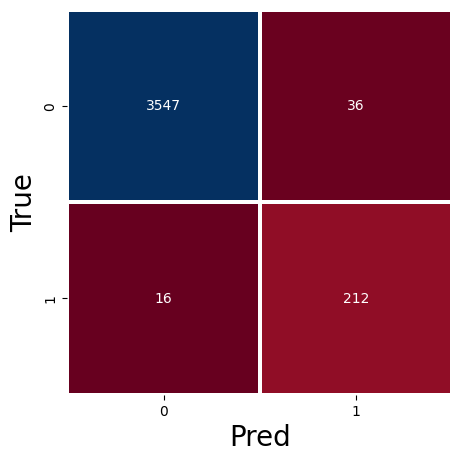

acc = 0.9863552873261611
precision = 0.8548387096774194
TPR = 0.9298245614035088
FAR = 0.010047446274072006
FRR = 0.07017543859649122


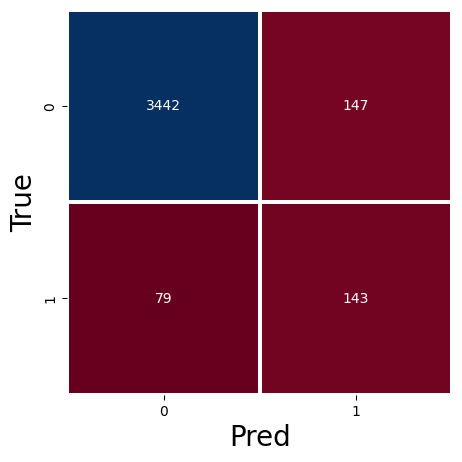

acc = 0.940697979532931
precision = 0.49310344827586206
TPR = 0.6441441441441441
FAR = 0.04095848425745333
FRR = 0.35585585585585583


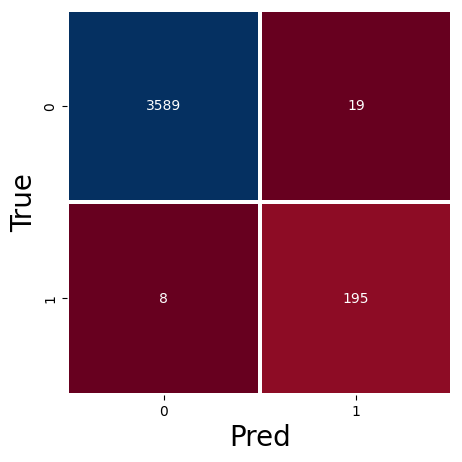

acc = 0.9929152453424298
precision = 0.9112149532710281
TPR = 0.9605911330049262
FAR = 0.005266075388026608
FRR = 0.03940886699507389


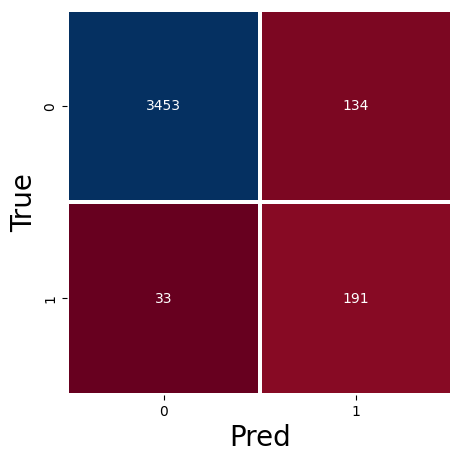

acc = 0.9561794804513251
precision = 0.5876923076923077
TPR = 0.8526785714285714
FAR = 0.037357122943964316
FRR = 0.14732142857142858


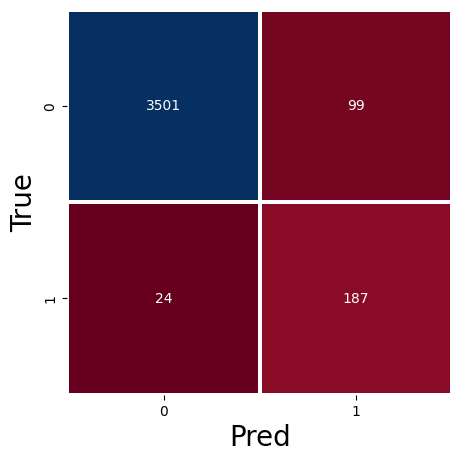

acc = 0.967725006559958
precision = 0.6538461538461539
TPR = 0.8862559241706162
FAR = 0.0275
FRR = 0.11374407582938388


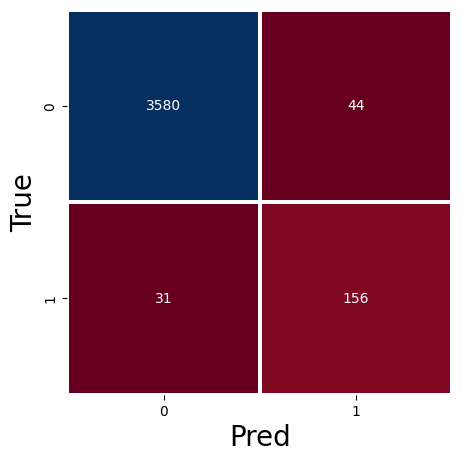

acc = 0.9803201259511939
precision = 0.78
TPR = 0.8342245989304813
FAR = 0.012141280353200883
FRR = 0.1657754010695187


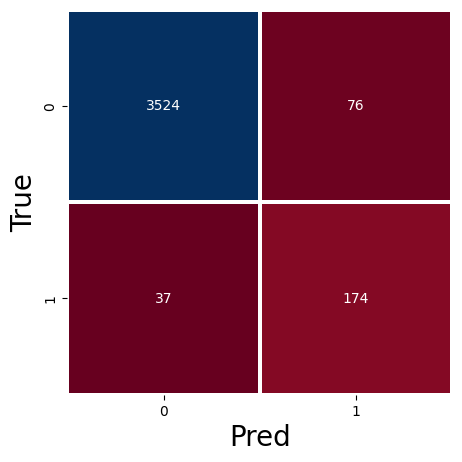

acc = 0.9703489897664654
precision = 0.696
TPR = 0.8246445497630331
FAR = 0.021111111111111112
FRR = 0.17535545023696683


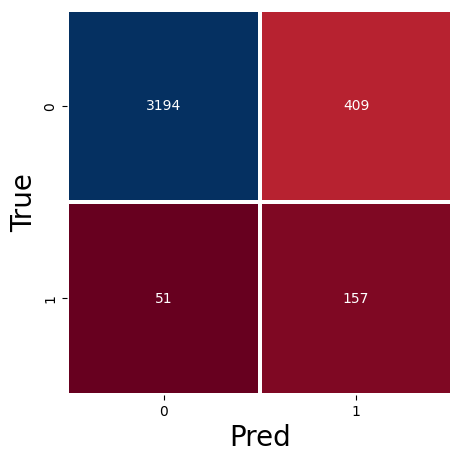

acc = 0.879296772500656
precision = 0.2773851590106007
TPR = 0.7548076923076923
FAR = 0.11351651401609769
FRR = 0.24519230769230768


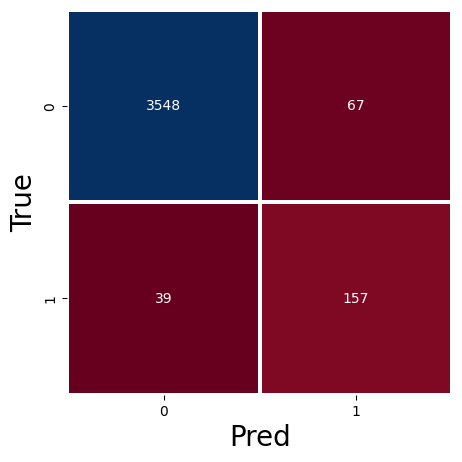

acc = 0.9721857780110207
precision = 0.7008928571428571
TPR = 0.8010204081632653
FAR = 0.018533886583679115
FRR = 0.1989795918367347


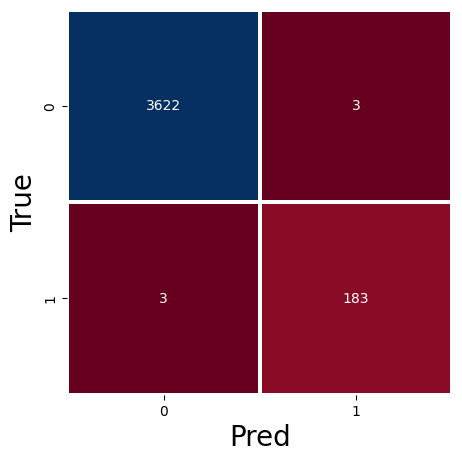

acc = 0.9984256100760955
precision = 0.9838709677419355
TPR = 0.9838709677419355
FAR = 0.0008275862068965517
FRR = 0.016129032258064516


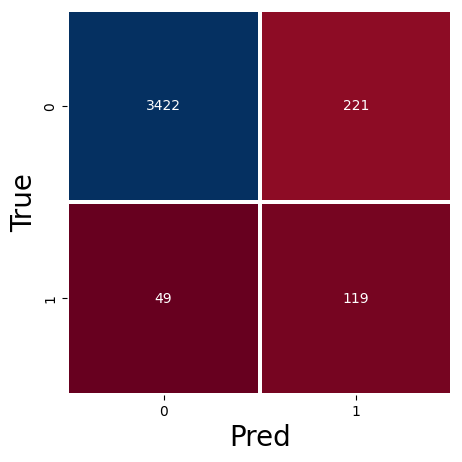

acc = 0.9291524534242981
precision = 0.35
TPR = 0.7083333333333334
FAR = 0.060664287674993135
FRR = 0.2916666666666667


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


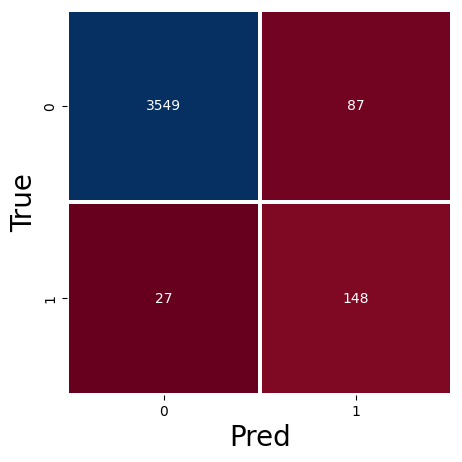

acc = 0.9700865914458148
precision = 0.6297872340425532
TPR = 0.8457142857142858
FAR = 0.02392739273927393
FRR = 0.15428571428571428


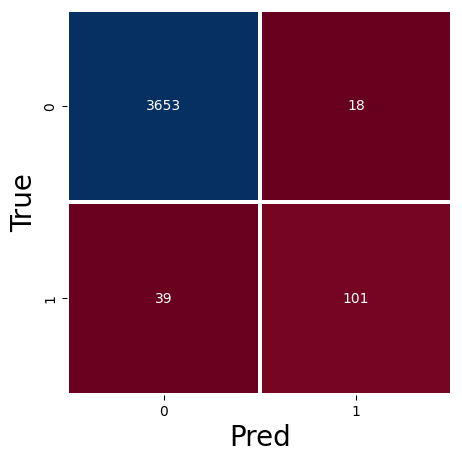

acc = 0.9850432957229074
precision = 0.8487394957983193
TPR = 0.7214285714285714
FAR = 0.00490329610460365
FRR = 0.2785714285714286


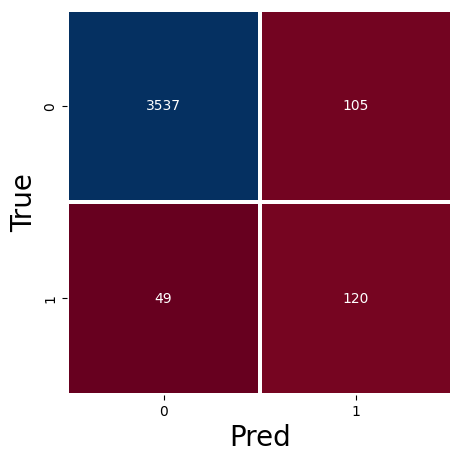

acc = 0.9595906586197849
precision = 0.5333333333333333
TPR = 0.7100591715976331
FAR = 0.028830313014827018
FRR = 0.28994082840236685


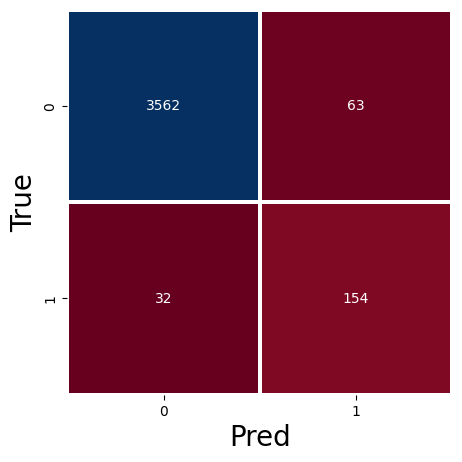

acc = 0.9750721595381789
precision = 0.7096774193548387
TPR = 0.8279569892473119
FAR = 0.017379310344827585
FRR = 0.17204301075268819


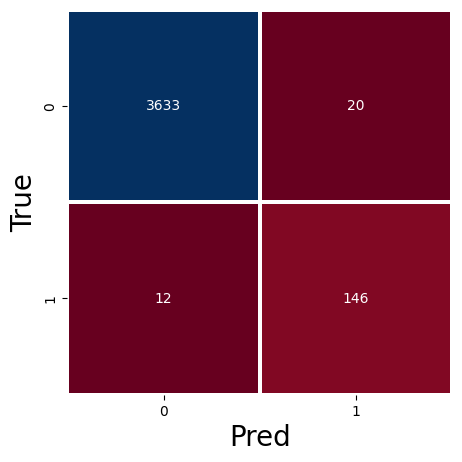

acc = 0.991603253739176
precision = 0.8795180722891566
TPR = 0.9240506329113924
FAR = 0.005474952094169176
FRR = 0.0759493670886076
average acc = 0.9669792429117926
average precision = 0.693874912372693
average TPR = 0.8258468381009446
average FAR = 0.025336226043020122
average FRR = 0.17415316189905536
average EER = 0.005474952094169176


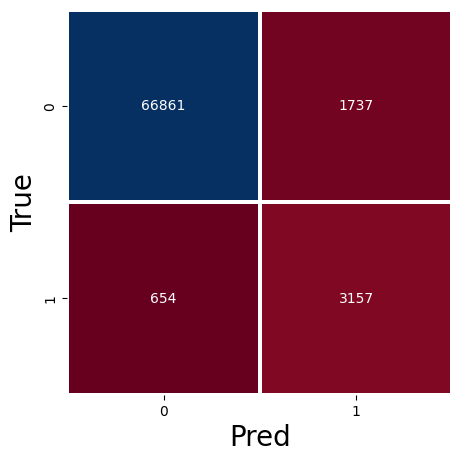

In [11]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        MLP = MLPClassifier(hidden_layer_sizes=(100,10))

        MLP.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = MLP.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


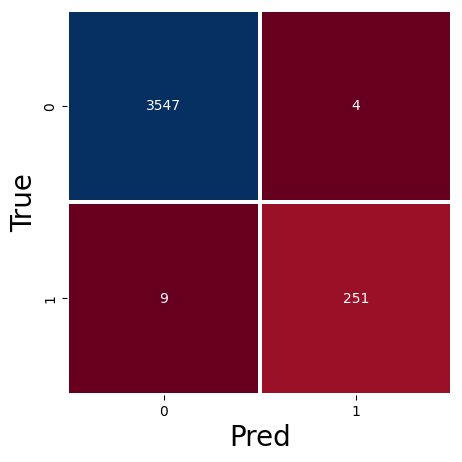

acc = 0.9965888218315403
precision = 0.984313725490196
TPR = 0.9653846153846154
FAR = 0.001126443255421008
FRR = 0.03461538461538462


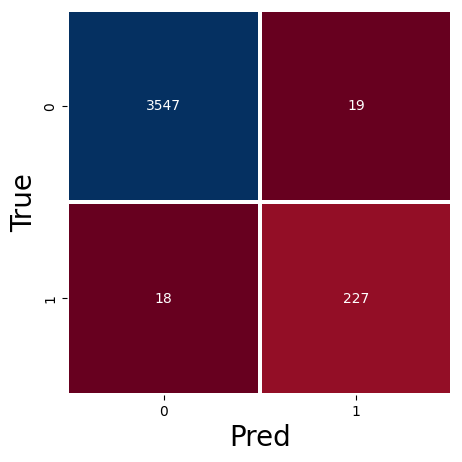

acc = 0.9902912621359223
precision = 0.9227642276422764
TPR = 0.926530612244898
FAR = 0.00532809871003926
FRR = 0.07346938775510205


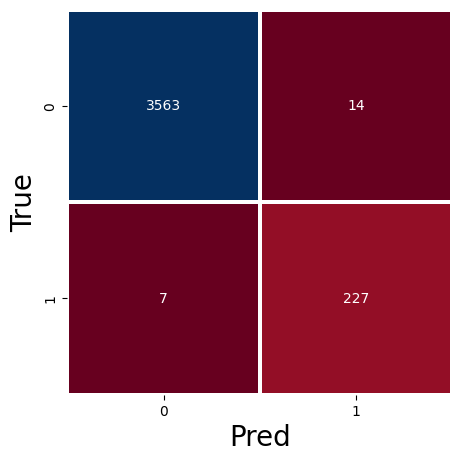

acc = 0.9944896352663343
precision = 0.941908713692946
TPR = 0.9700854700854701
FAR = 0.003913894324853229
FRR = 0.029914529914529916


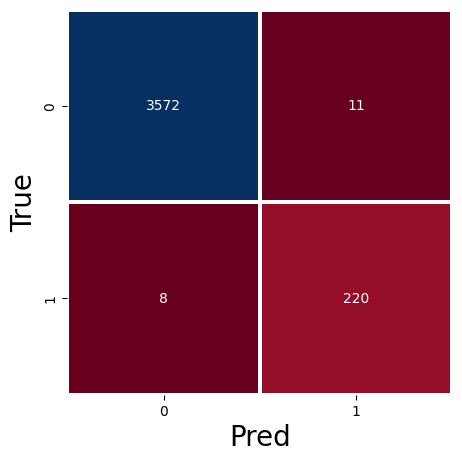

acc = 0.9950144319076358
precision = 0.9523809523809523
TPR = 0.9649122807017544
FAR = 0.0030700530281886685
FRR = 0.03508771929824561


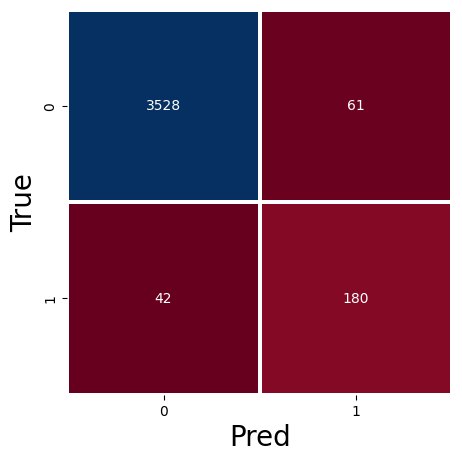

acc = 0.972972972972973
precision = 0.7468879668049793
TPR = 0.8108108108108109
FAR = 0.01699637782112009
FRR = 0.1891891891891892


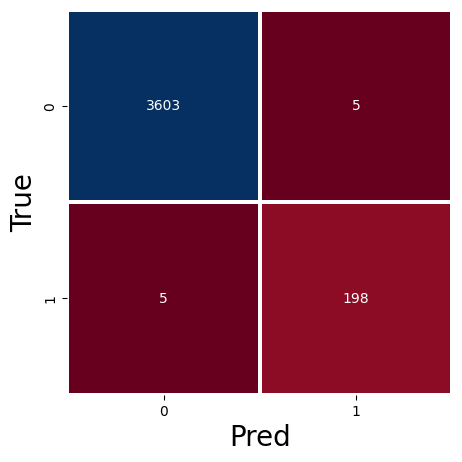

acc = 0.9973760167934925
precision = 0.9753694581280788
TPR = 0.9753694581280788
FAR = 0.001385809312638581
FRR = 0.024630541871921183


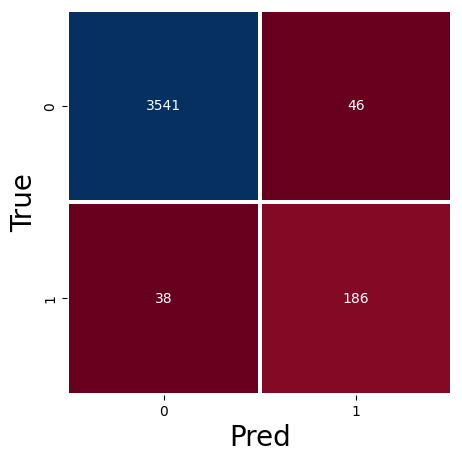

acc = 0.9779585410653372
precision = 0.8017241379310345
TPR = 0.8303571428571429
FAR = 0.01282408698076387
FRR = 0.16964285714285715


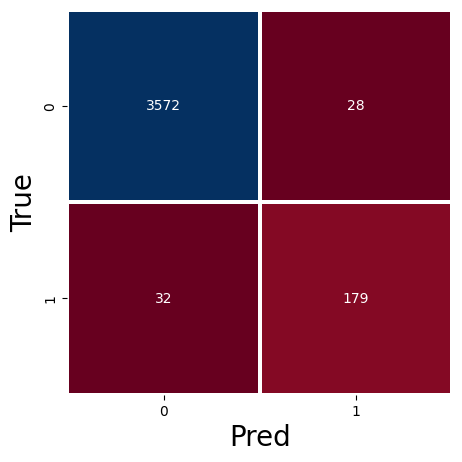

acc = 0.9842561007609552
precision = 0.8647342995169082
TPR = 0.8483412322274881
FAR = 0.0077777777777777776
FRR = 0.15165876777251186


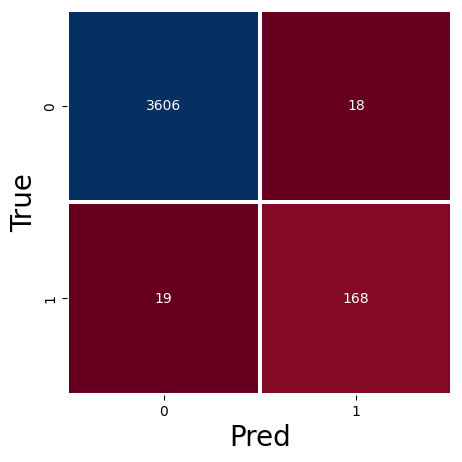

acc = 0.9902912621359223
precision = 0.9032258064516129
TPR = 0.8983957219251337
FAR = 0.004966887417218543
FRR = 0.10160427807486631


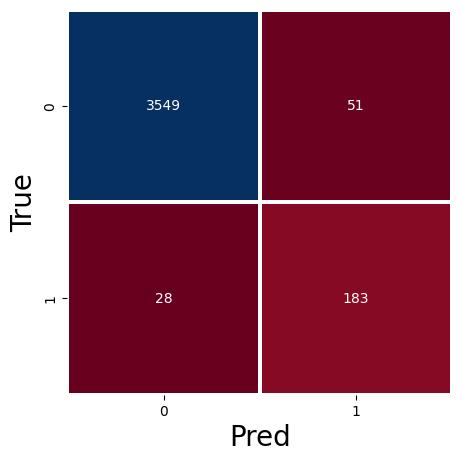

acc = 0.9792705326685909
precision = 0.782051282051282
TPR = 0.8672985781990521
FAR = 0.014166666666666666
FRR = 0.13270142180094788


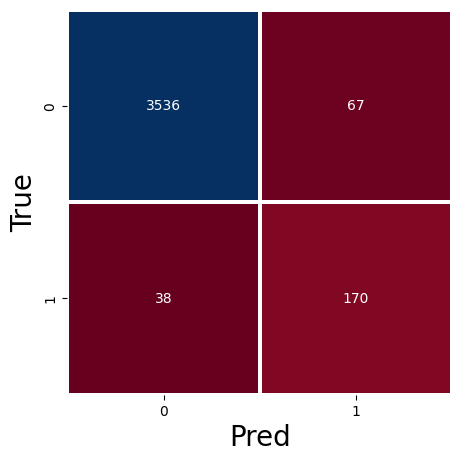

acc = 0.9724481763316715
precision = 0.7172995780590717
TPR = 0.8173076923076923
FAR = 0.018595614765473216
FRR = 0.18269230769230768


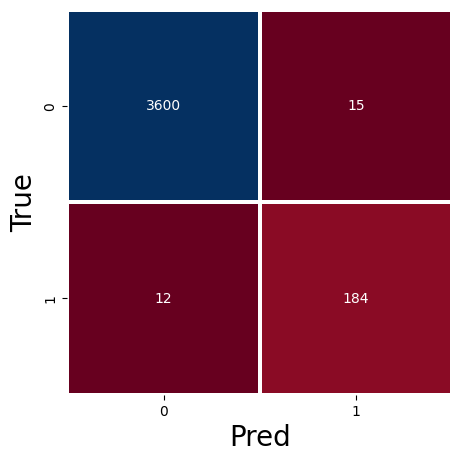

acc = 0.9929152453424298
precision = 0.9246231155778895
TPR = 0.9387755102040817
FAR = 0.004149377593360996
FRR = 0.061224489795918366


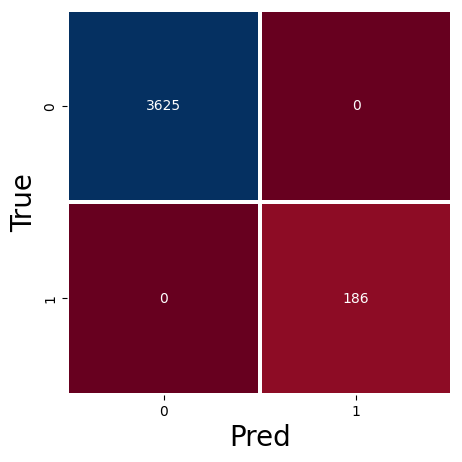

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


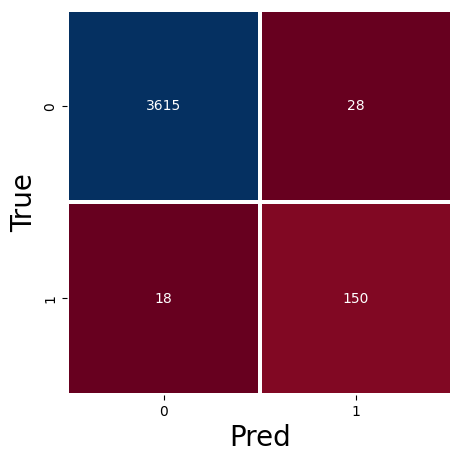

acc = 0.9879296772500656
precision = 0.8426966292134831
TPR = 0.8928571428571429
FAR = 0.0076859730990941535
FRR = 0.10714285714285714


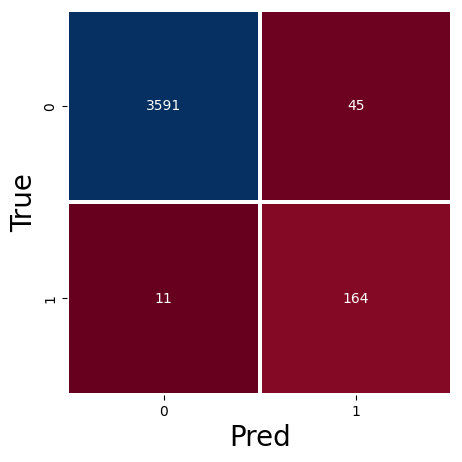

acc = 0.9853056940435582
precision = 0.784688995215311
TPR = 0.9371428571428572
FAR = 0.012376237623762377
FRR = 0.06285714285714286


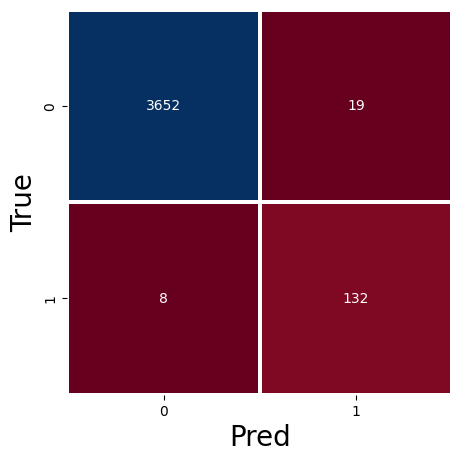

acc = 0.9929152453424298
precision = 0.8741721854304636
TPR = 0.9428571428571428
FAR = 0.005175701443748297
FRR = 0.05714285714285714


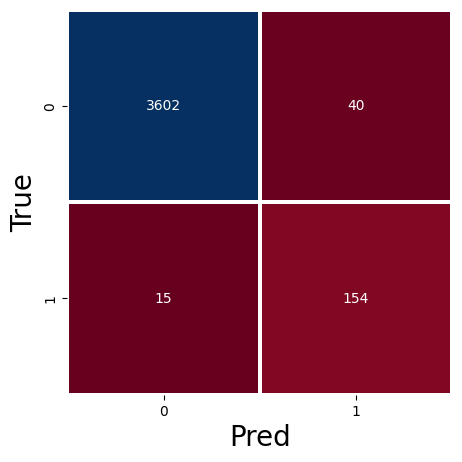

acc = 0.9855680923642088
precision = 0.7938144329896907
TPR = 0.9112426035502958
FAR = 0.010982976386600769
FRR = 0.08875739644970414


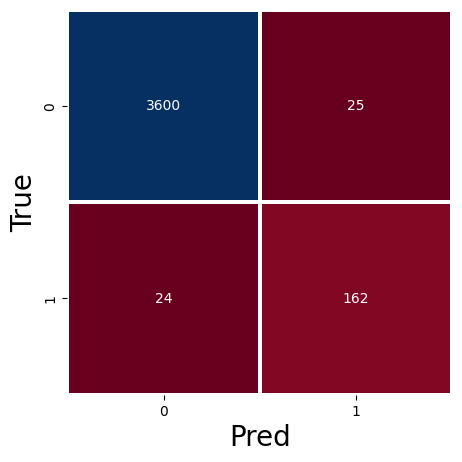

acc = 0.9871424822881134
precision = 0.8663101604278075
TPR = 0.8709677419354839
FAR = 0.006896551724137931
FRR = 0.12903225806451613


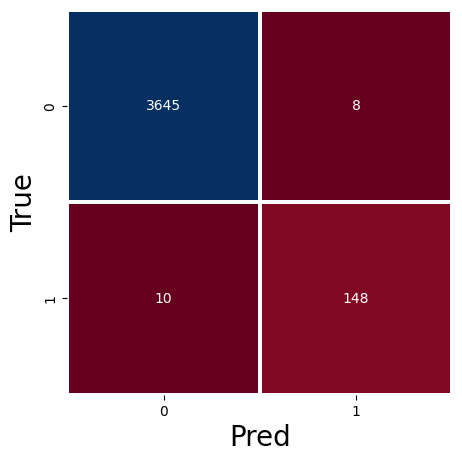

acc = 0.9952768302282865
precision = 0.9487179487179487
TPR = 0.9367088607594937
FAR = 0.0021899808376676703
FRR = 0.06329113924050633
average acc = 0.9883163695120771
average precision = 0.8751412429327332
average TPR = 0.9108076565357177
average FAR = 0.0073478162509754245
average FRR = 0.08919234346428241
average EER = 0.0021899808376676703


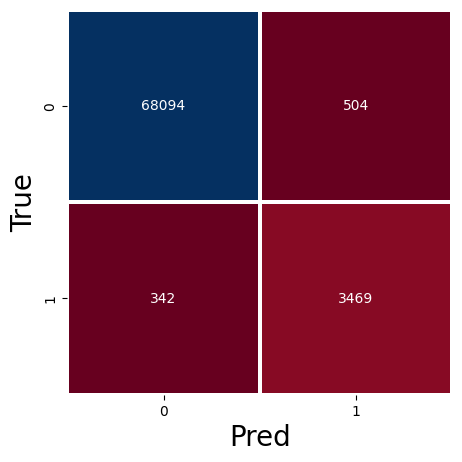

In [12]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        DT = DecisionTreeClassifier(criterion='entropy')

        DT.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = DT.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


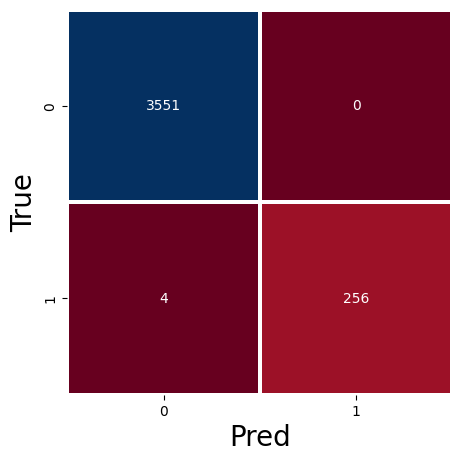

acc = 0.998950406717397
precision = 1.0
TPR = 0.9846153846153847
FAR = 0.0
FRR = 0.015384615384615385


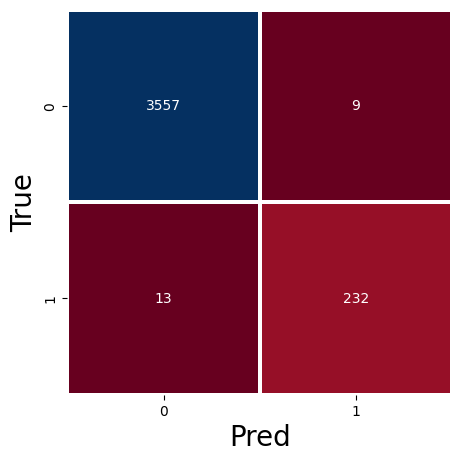

acc = 0.9942272369456836
precision = 0.9626556016597511
TPR = 0.9469387755102041
FAR = 0.0025238362310712283
FRR = 0.053061224489795916


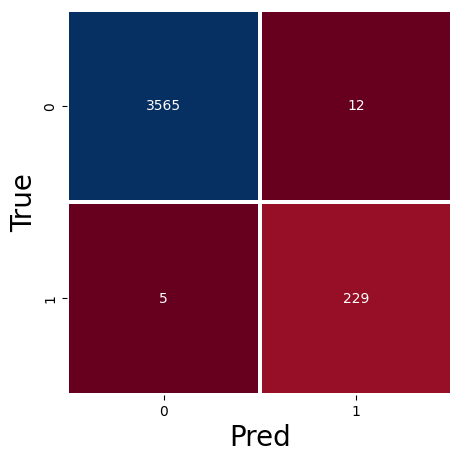

acc = 0.9955392285489373
precision = 0.950207468879668
TPR = 0.9786324786324786
FAR = 0.0033547665641599105
FRR = 0.021367521367521368


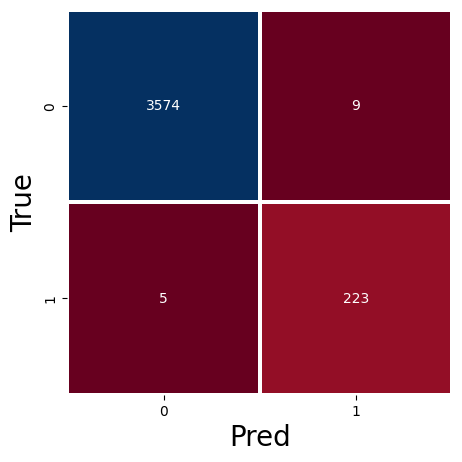

acc = 0.9963264235108895
precision = 0.9612068965517241
TPR = 0.9780701754385965
FAR = 0.0025118615685180016
FRR = 0.021929824561403508


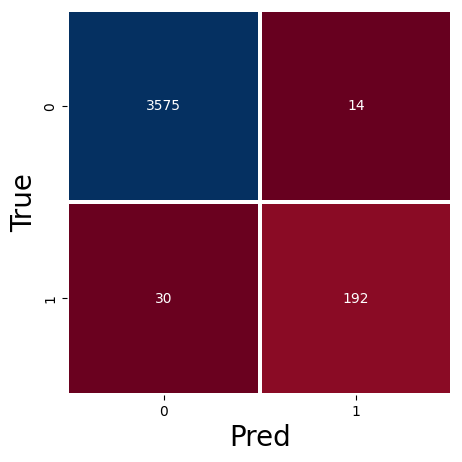

acc = 0.9884544738913671
precision = 0.9320388349514563
TPR = 0.8648648648648649
FAR = 0.003900808024519365
FRR = 0.13513513513513514


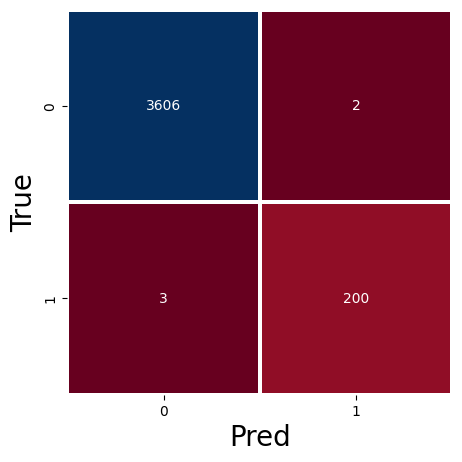

acc = 0.9986880083967462
precision = 0.9900990099009901
TPR = 0.9852216748768473
FAR = 0.0005543237250554324
FRR = 0.014778325123152709


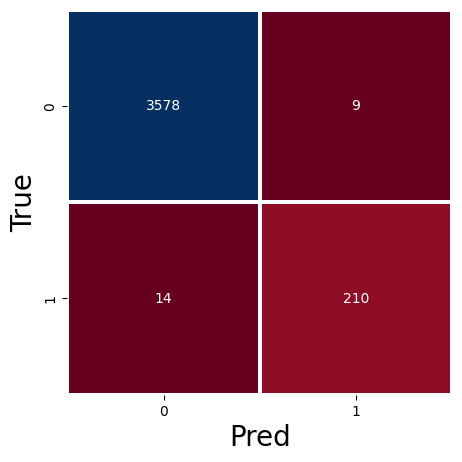

acc = 0.9939648386250328
precision = 0.958904109589041
TPR = 0.9375
FAR = 0.002509060496236409
FRR = 0.0625


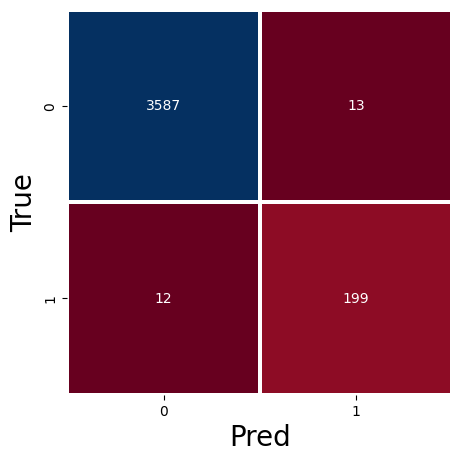

acc = 0.9934400419837313
precision = 0.9386792452830188
TPR = 0.943127962085308
FAR = 0.003611111111111111
FRR = 0.05687203791469194


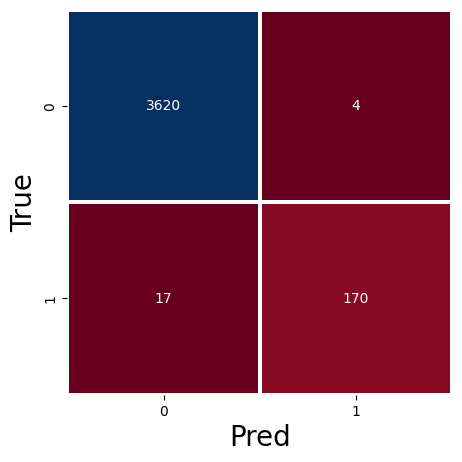

acc = 0.9944896352663343
precision = 0.9770114942528736
TPR = 0.9090909090909091
FAR = 0.0011037527593818985
FRR = 0.09090909090909091


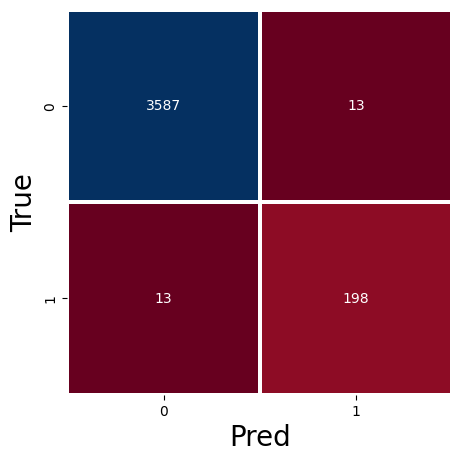

acc = 0.9931776436630806
precision = 0.9383886255924171
TPR = 0.9383886255924171
FAR = 0.003611111111111111
FRR = 0.061611374407582936


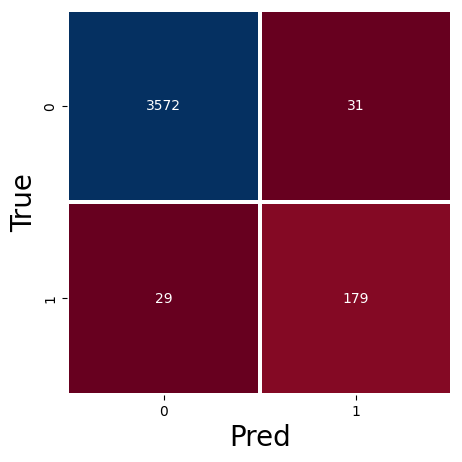

acc = 0.9842561007609552
precision = 0.8523809523809524
TPR = 0.8605769230769231
FAR = 0.008603941160144324
FRR = 0.13942307692307693


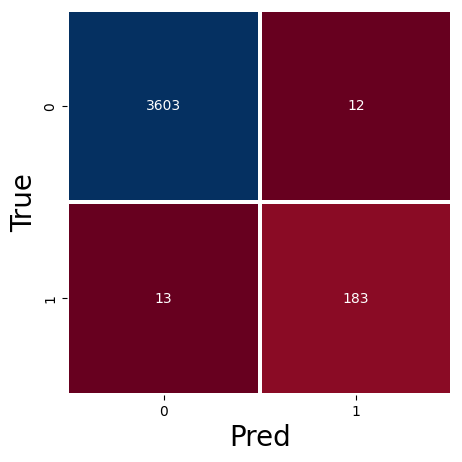

acc = 0.9934400419837313
precision = 0.9384615384615385
TPR = 0.9336734693877551
FAR = 0.0033195020746887966
FRR = 0.0663265306122449


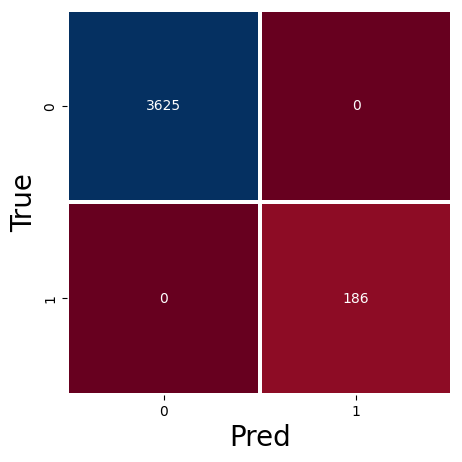

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


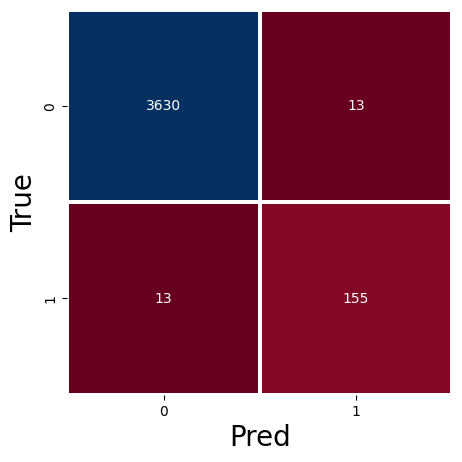

acc = 0.9931776436630806
precision = 0.9226190476190477
TPR = 0.9226190476190477
FAR = 0.003568487510293714
FRR = 0.07738095238095238


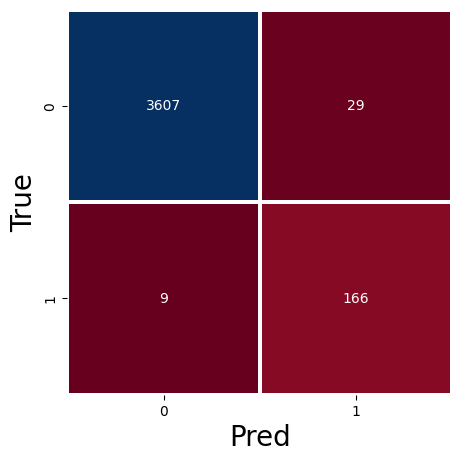

acc = 0.9900288638152716
precision = 0.8512820512820513
TPR = 0.9485714285714286
FAR = 0.007975797579757976
FRR = 0.05142857142857143


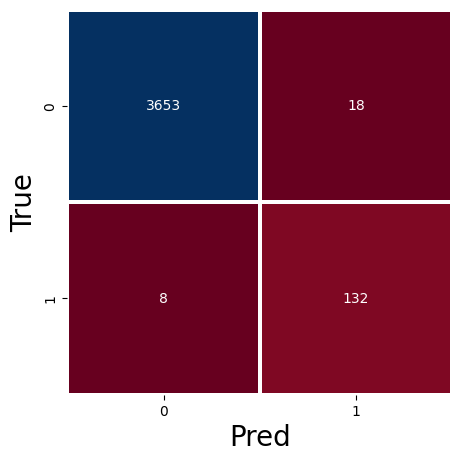

acc = 0.9931776436630806
precision = 0.88
TPR = 0.9428571428571428
FAR = 0.00490329610460365
FRR = 0.05714285714285714


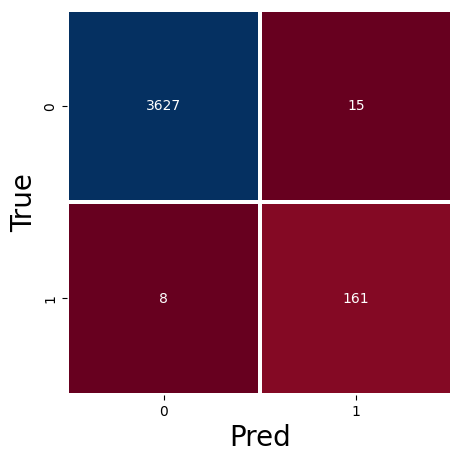

acc = 0.9939648386250328
precision = 0.9147727272727273
TPR = 0.9526627218934911
FAR = 0.004118616144975288
FRR = 0.047337278106508875


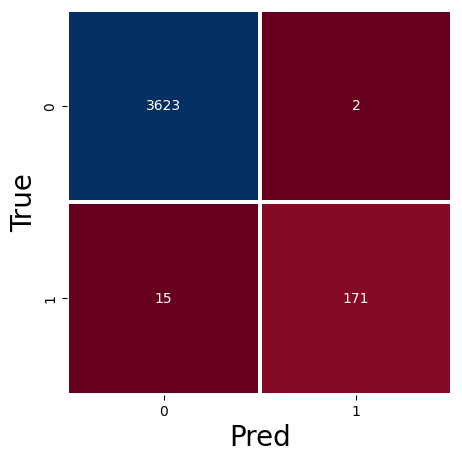

acc = 0.9955392285489373
precision = 0.9884393063583815
TPR = 0.9193548387096774
FAR = 0.0005517241379310345
FRR = 0.08064516129032258


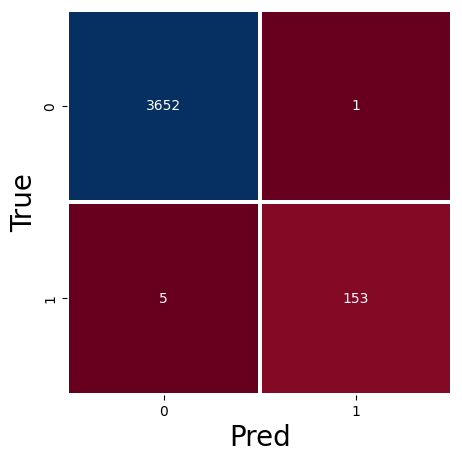

acc = 0.9984256100760955
precision = 0.9935064935064936
TPR = 0.9683544303797469
FAR = 0.0002737476047084588
FRR = 0.03164556962025317
average acc = 0.9941719951939679
average precision = 0.9447712317653755
average TPR = 0.942901097536959
average FAR = 0.0029997759951719844
average FRR = 0.05709890246304089
average EER = 0.0002737476047084588


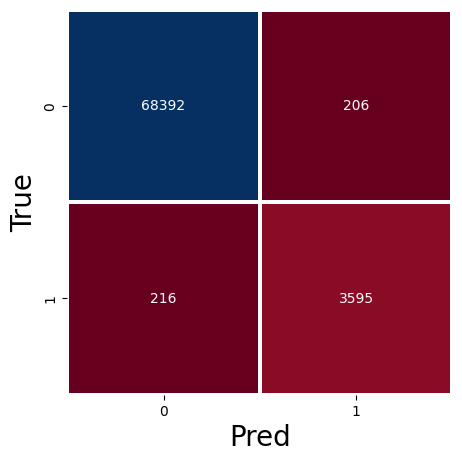

In [11]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

i=0
for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        RF = RandomForestClassifier(n_estimators=22)

        RF.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = RF.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
    pickle.dump(RF,open(f'./models/{i}model.pkl','wb'))
    i+=1
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


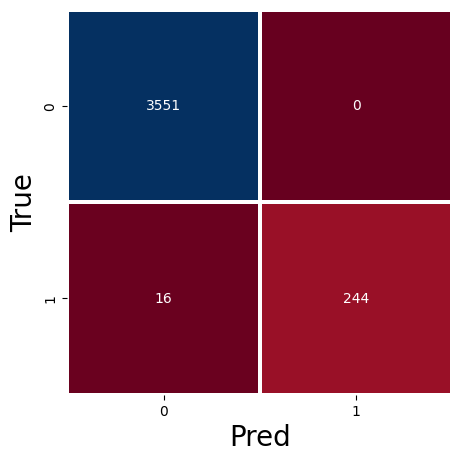

acc = 0.9958016268695881
precision = 1.0
TPR = 0.9384615384615385
FAR = 0.0
FRR = 0.06153846153846154


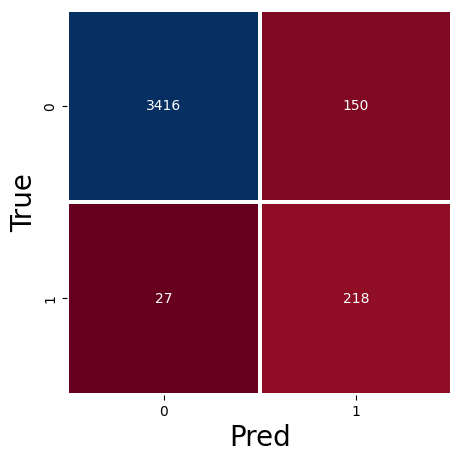

acc = 0.9535554972448176
precision = 0.592391304347826
TPR = 0.889795918367347
FAR = 0.04206393718452047
FRR = 0.11020408163265306


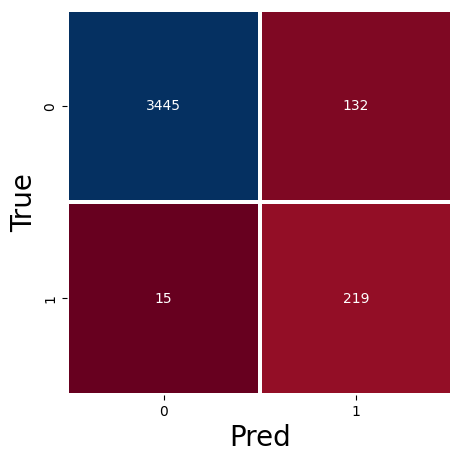

acc = 0.9614274468643401
precision = 0.6239316239316239
TPR = 0.9358974358974359
FAR = 0.03690243220575901
FRR = 0.0641025641025641


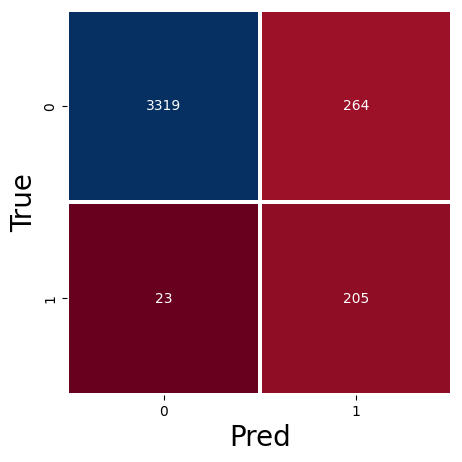

acc = 0.9246916819732354
precision = 0.43710021321961623
TPR = 0.8991228070175439
FAR = 0.07368127267652805
FRR = 0.10087719298245613


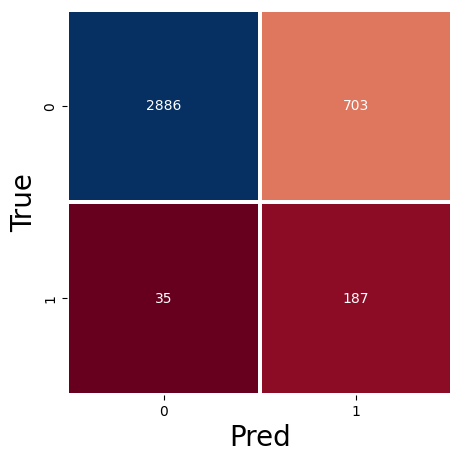

acc = 0.8063500393597481
precision = 0.2101123595505618
TPR = 0.8423423423423423
FAR = 0.1958762886597938
FRR = 0.15765765765765766


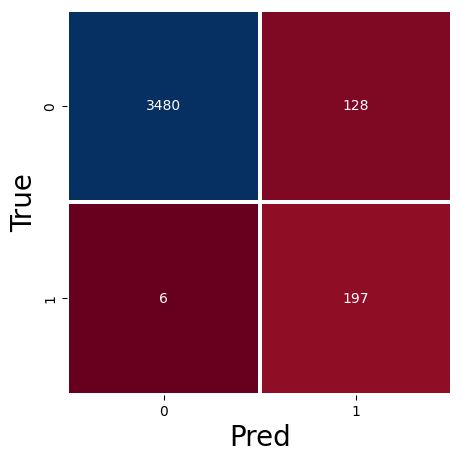

acc = 0.9648386250327998
precision = 0.6061538461538462
TPR = 0.9704433497536946
FAR = 0.03547671840354767
FRR = 0.029556650246305417


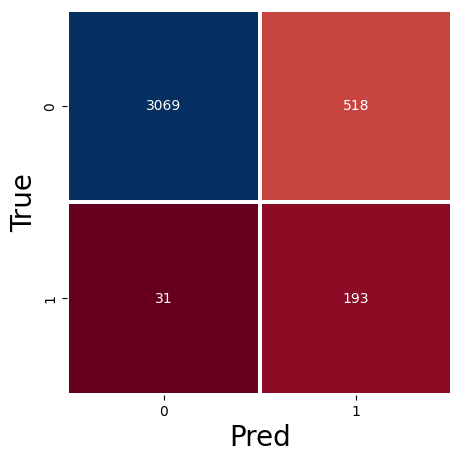

acc = 0.8559433219627395
precision = 0.2714486638537271
TPR = 0.8616071428571429
FAR = 0.14441037078338445
FRR = 0.13839285714285715


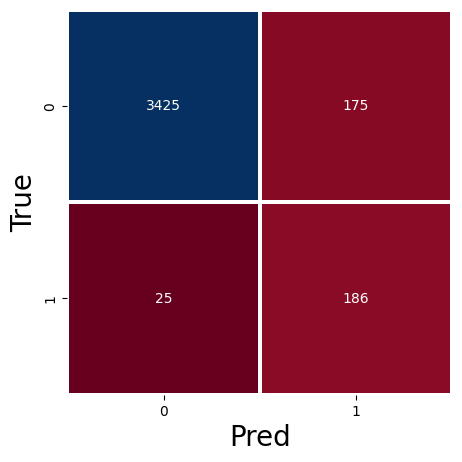

acc = 0.9475203358698504
precision = 0.5152354570637119
TPR = 0.8815165876777251
FAR = 0.04861111111111111
FRR = 0.11848341232227488


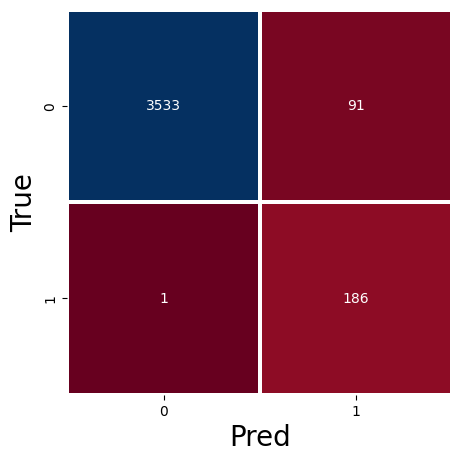

acc = 0.9758593545001312
precision = 0.6714801444043321
TPR = 0.9946524064171123
FAR = 0.02511037527593819
FRR = 0.0053475935828877


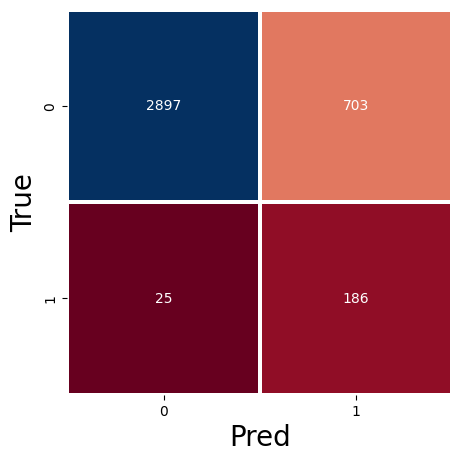

acc = 0.8089740225662556
precision = 0.2092238470191226
TPR = 0.8815165876777251
FAR = 0.19527777777777777
FRR = 0.11848341232227488


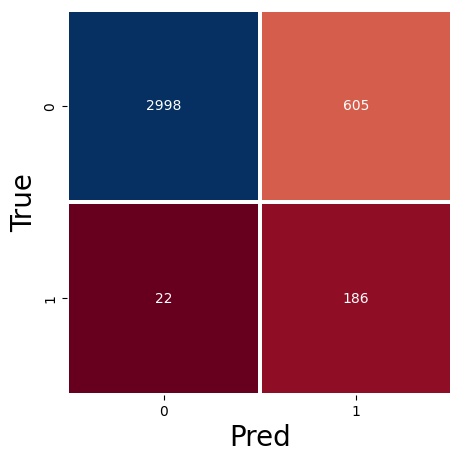

acc = 0.8354762529519811
precision = 0.23514538558786346
TPR = 0.8942307692307693
FAR = 0.16791562586733277
FRR = 0.10576923076923077


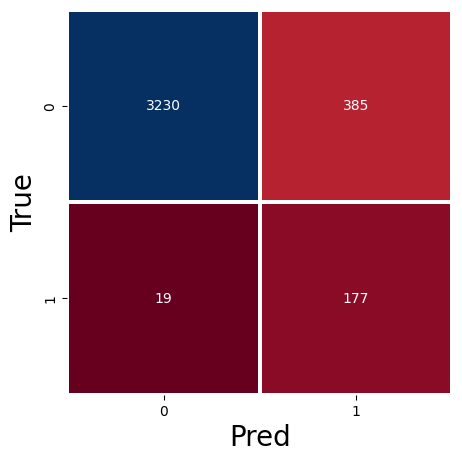

acc = 0.8939910784570979
precision = 0.31494661921708184
TPR = 0.9030612244897959
FAR = 0.10650069156293222
FRR = 0.09693877551020408


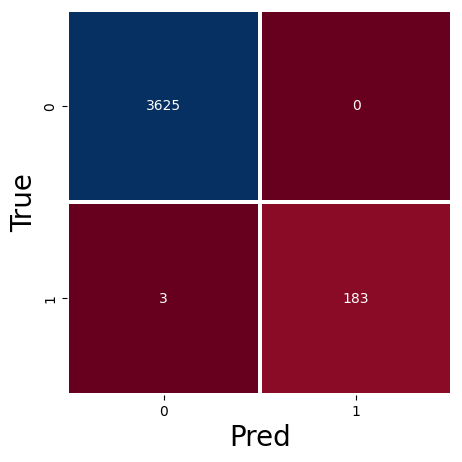

acc = 0.9992128050380478
precision = 1.0
TPR = 0.9838709677419355
FAR = 0.0
FRR = 0.016129032258064516


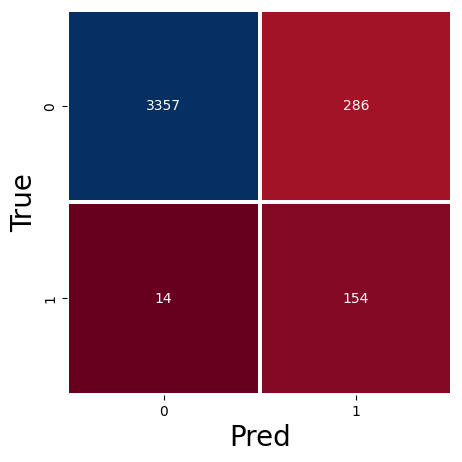

acc = 0.9212805038047757
precision = 0.35
TPR = 0.9166666666666666
FAR = 0.07850672522646171
FRR = 0.08333333333333333


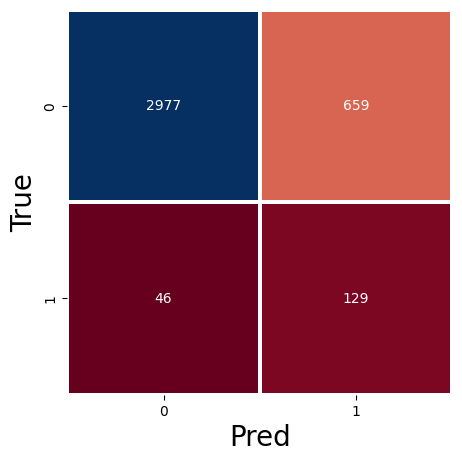

acc = 0.8150091839412228
precision = 0.16370558375634517
TPR = 0.7371428571428571
FAR = 0.18124312431243125
FRR = 0.26285714285714284


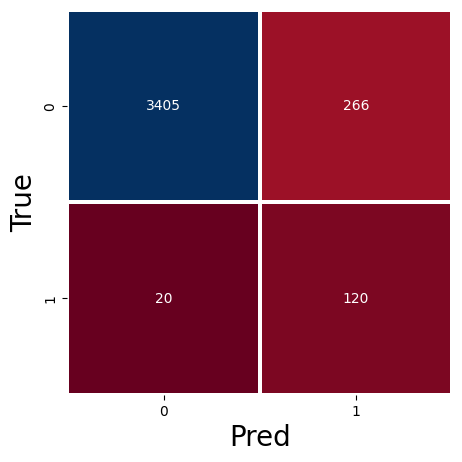

acc = 0.9249540802938861
precision = 0.31088082901554404
TPR = 0.8571428571428571
FAR = 0.07245982021247617
FRR = 0.14285714285714285


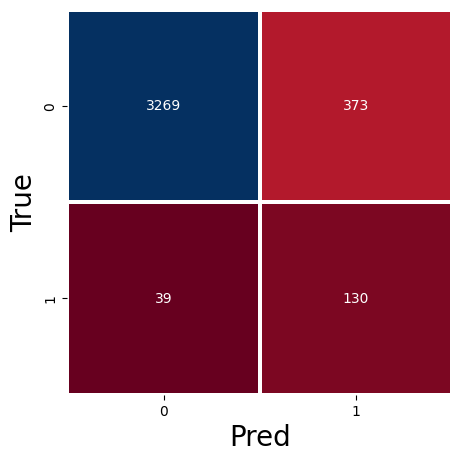

acc = 0.8918918918918919
precision = 0.2584493041749503
TPR = 0.7692307692307693
FAR = 0.10241625480505218
FRR = 0.23076923076923078


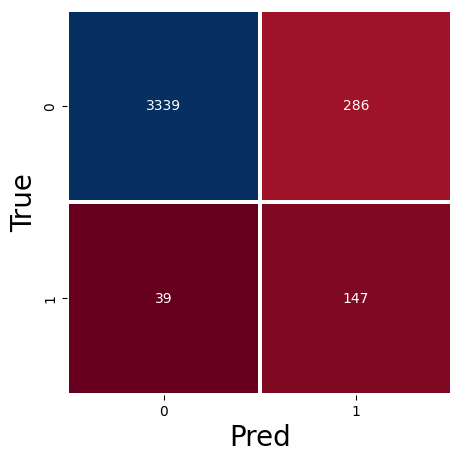

acc = 0.9147205457885069
precision = 0.3394919168591224
TPR = 0.7903225806451613
FAR = 0.07889655172413793
FRR = 0.20967741935483872


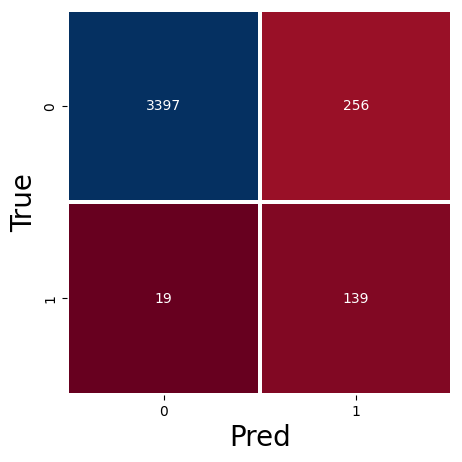

acc = 0.9278404618210443
precision = 0.3518987341772152
TPR = 0.879746835443038
FAR = 0.07007938680536545
FRR = 0.12025316455696203
average acc = 0.91154414506484
average precision = 0.44534714907013107
average TPR = 0.8856195602212348
average FAR = 0.08712781392602897
average FRR = 0.11438043977876539
average EER = 0.07007938680536545


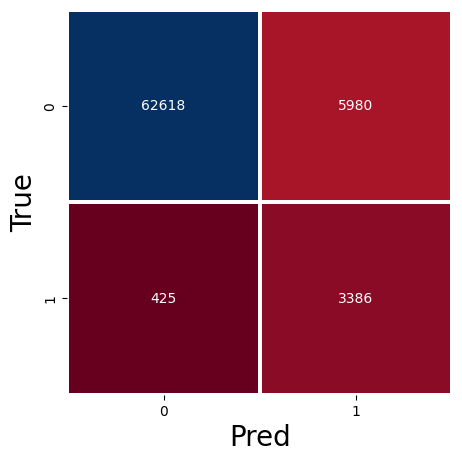

In [14]:
precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        GNB = GaussianNB()

        GNB.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = GNB.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


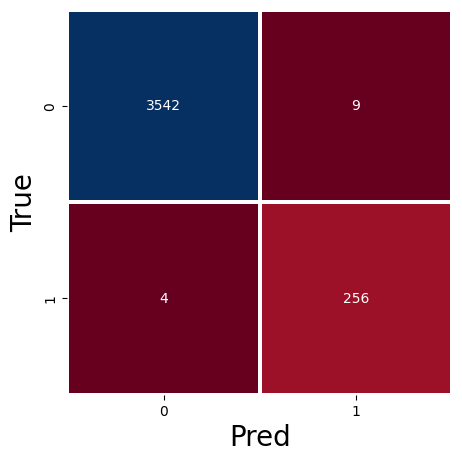

acc = 0.9965888218315403
precision = 0.9660377358490566
TPR = 0.9846153846153847
FAR = 0.0025344973246972683
FRR = 0.015384615384615385


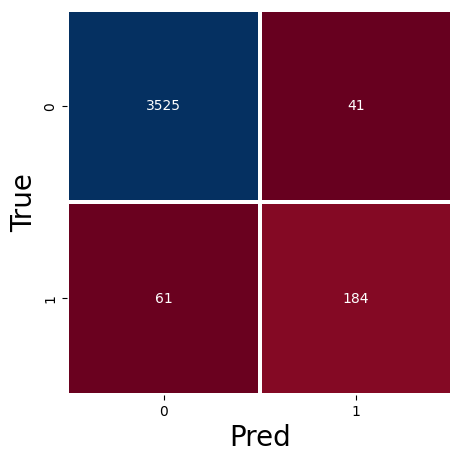

acc = 0.9732353712936237
precision = 0.8177777777777778
TPR = 0.7510204081632653
FAR = 0.011497476163768929
FRR = 0.24897959183673468


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


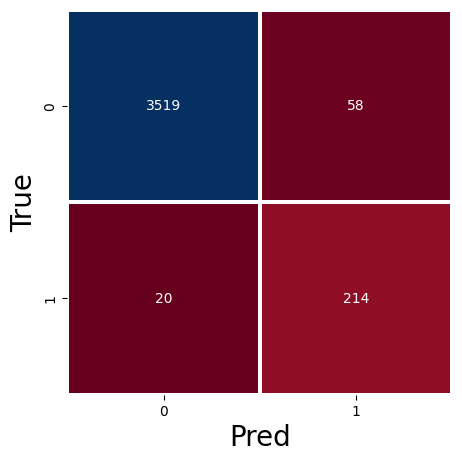

acc = 0.9795329309892417
precision = 0.7867647058823529
TPR = 0.9145299145299145
FAR = 0.016214705060106235
FRR = 0.08547008547008547


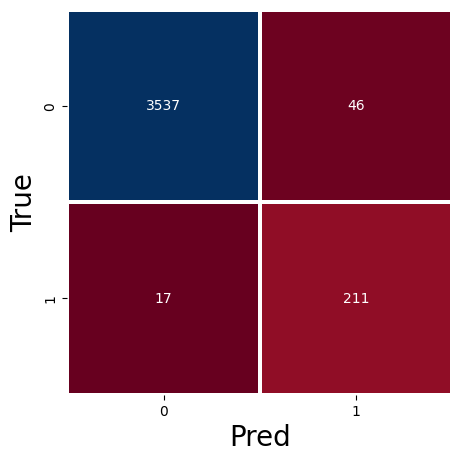

acc = 0.9834689057990029
precision = 0.8210116731517509
TPR = 0.9254385964912281
FAR = 0.012838403572425341
FRR = 0.07456140350877193


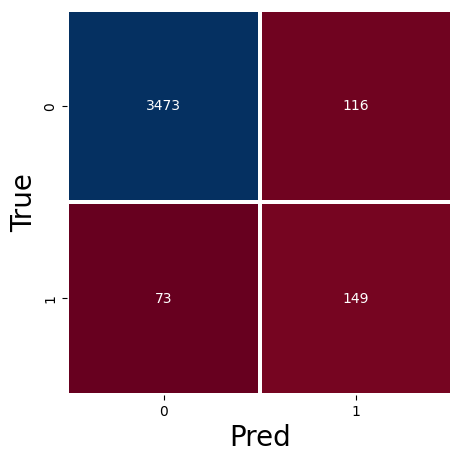

acc = 0.9504067173970087
precision = 0.5622641509433962
TPR = 0.6711711711711712
FAR = 0.032320980774589024
FRR = 0.32882882882882886


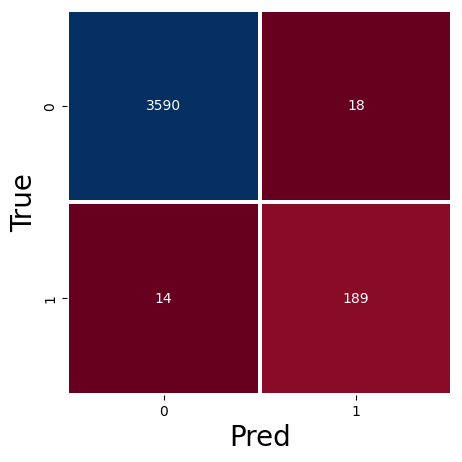

acc = 0.991603253739176
precision = 0.9130434782608695
TPR = 0.9310344827586207
FAR = 0.004988913525498891
FRR = 0.06896551724137931


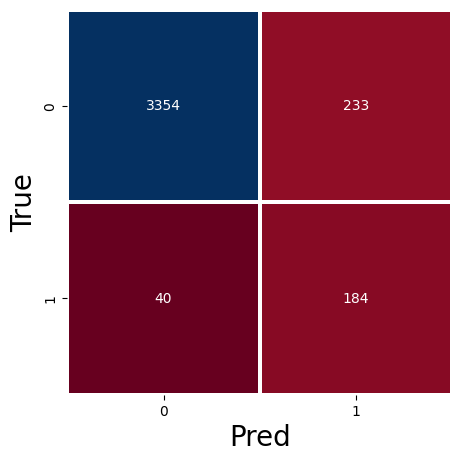

acc = 0.9283652584623459
precision = 0.4412470023980815
TPR = 0.8214285714285714
FAR = 0.06495678840256482
FRR = 0.17857142857142858


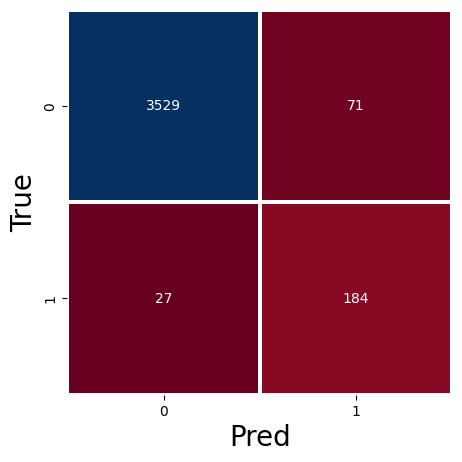

acc = 0.9742849645762267
precision = 0.7215686274509804
TPR = 0.8720379146919431
FAR = 0.01972222222222222
FRR = 0.12796208530805686


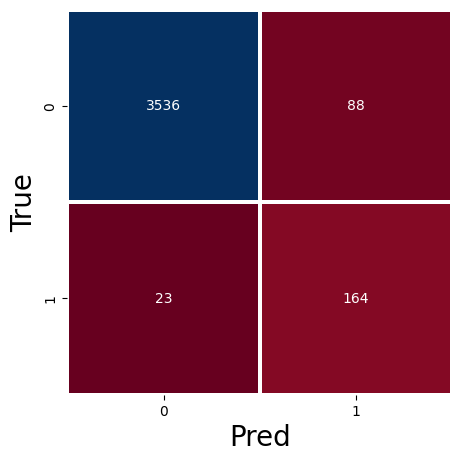

acc = 0.970873786407767
precision = 0.6507936507936508
TPR = 0.8770053475935828
FAR = 0.024282560706401765
FRR = 0.12299465240641712


c:\Users\louis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


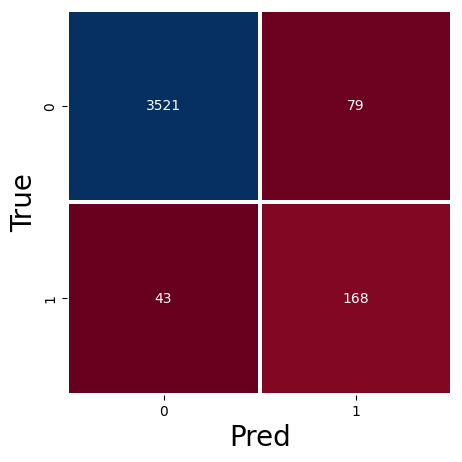

acc = 0.9679874048806087
precision = 0.680161943319838
TPR = 0.7962085308056872
FAR = 0.021944444444444444
FRR = 0.2037914691943128


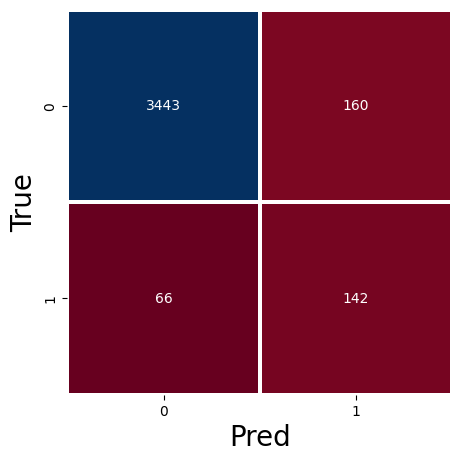

acc = 0.940697979532931
precision = 0.47019867549668876
TPR = 0.6826923076923077
FAR = 0.04440743824590619
FRR = 0.3173076923076923


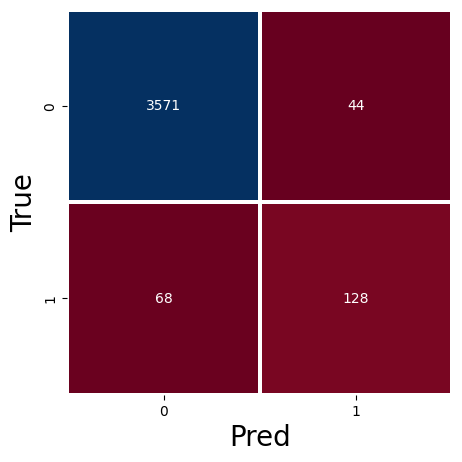

acc = 0.9706113880871162
precision = 0.7441860465116279
TPR = 0.6530612244897959
FAR = 0.012171507607192255
FRR = 0.3469387755102041


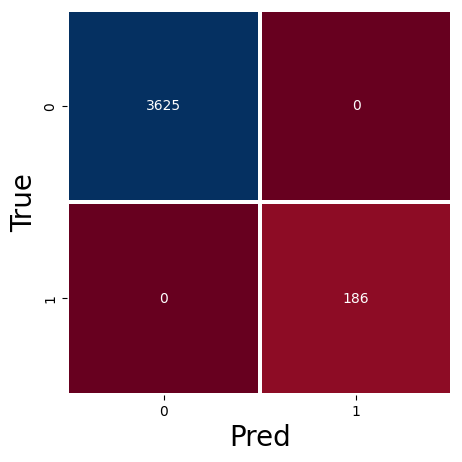

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


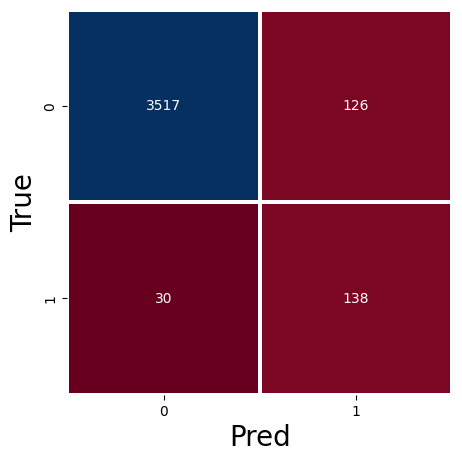

acc = 0.9590658619784833
precision = 0.5227272727272727
TPR = 0.8214285714285714
FAR = 0.03458687894592369
FRR = 0.17857142857142858


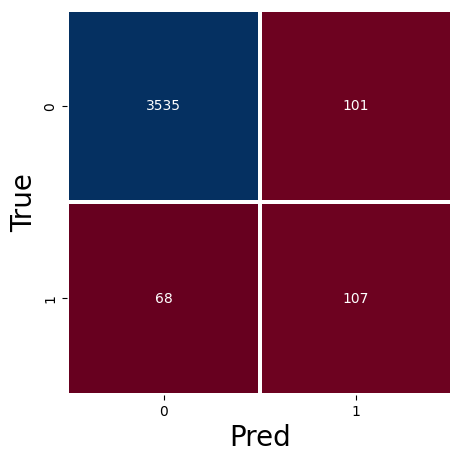

acc = 0.9556546838100236
precision = 0.5144230769230769
TPR = 0.6114285714285714
FAR = 0.027777777777777776
FRR = 0.38857142857142857


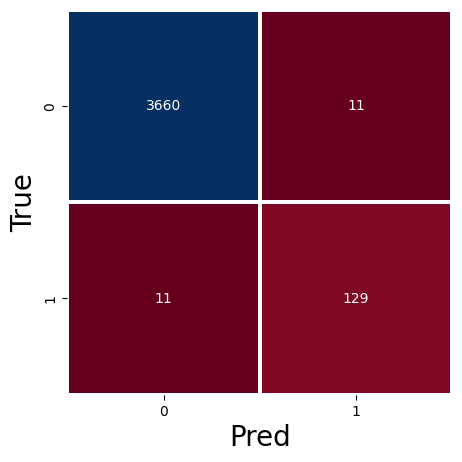

acc = 0.9942272369456836
precision = 0.9214285714285714
TPR = 0.9214285714285714
FAR = 0.0029964587305911197
FRR = 0.07857142857142857


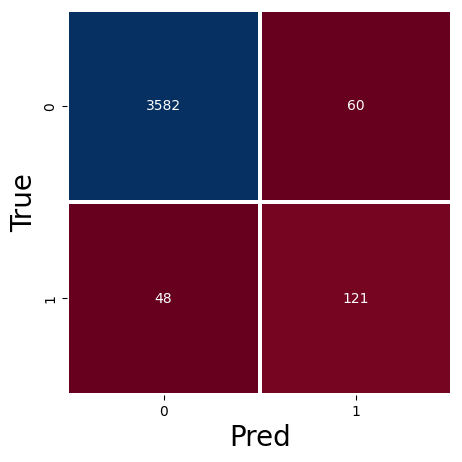

acc = 0.9716609813697192
precision = 0.6685082872928176
TPR = 0.7159763313609467
FAR = 0.016474464579901153
FRR = 0.28402366863905326


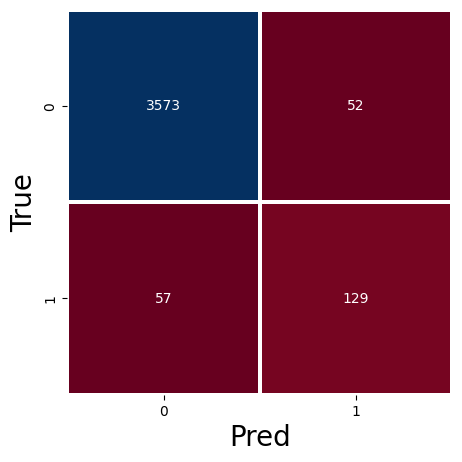

acc = 0.9713985830490685
precision = 0.712707182320442
TPR = 0.6935483870967742
FAR = 0.014344827586206896
FRR = 0.3064516129032258


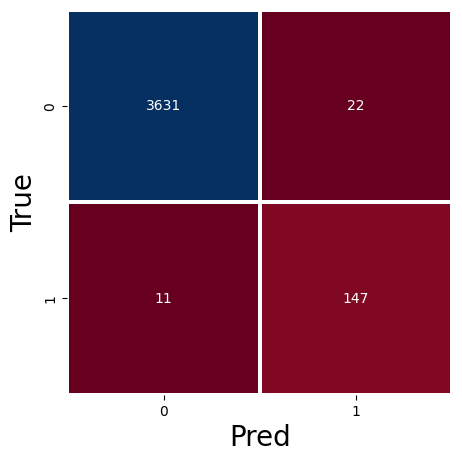

acc = 0.9913408554185253
precision = 0.8698224852071006
TPR = 0.930379746835443
FAR = 0.006022447303586094
FRR = 0.06962025316455696
average acc = 0.9721581571351626
average precision = 0.7255090707229133
average TPR = 0.8197070544215975
average FAR = 0.019478041735463376
average FRR = 0.18029294557840259
average EER = 0.006022447303586094


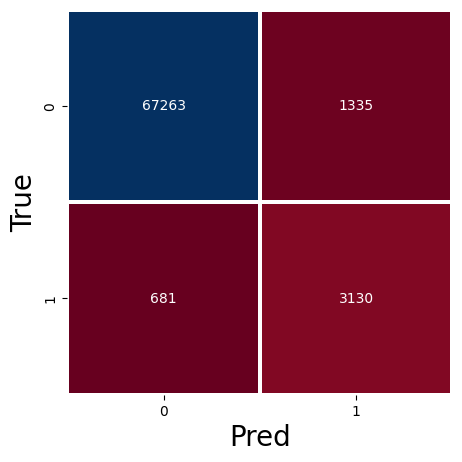

In [15]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        clf1 = svm.SVC(kernel='rbf', C=10)
        clf2 = MLPClassifier(hidden_layer_sizes=(100,10))
        voting_clf1 = VotingClassifier(estimators=[('svm', clf1), ('mlp', clf2)], voting='hard')
        
        voting_clf1.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = voting_clf1.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


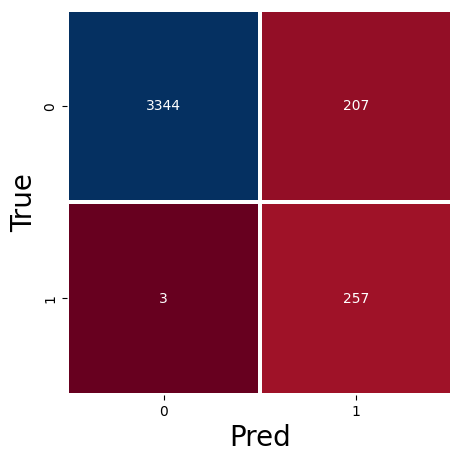

acc = 0.9448963526633429
precision = 0.5538793103448276
TPR = 0.9884615384615385
FAR = 0.058293438468037174
FRR = 0.011538461538461539


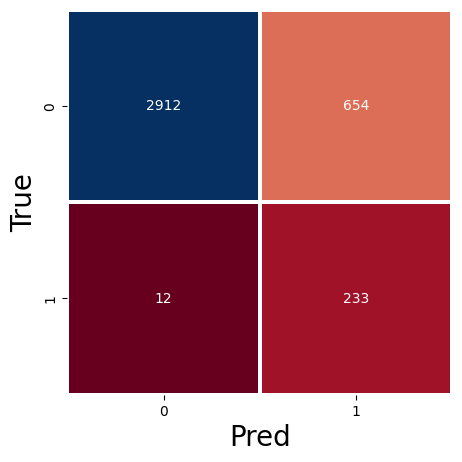

acc = 0.8252427184466019
precision = 0.26268320180383314
TPR = 0.9510204081632653
FAR = 0.18339876612450925
FRR = 0.04897959183673469


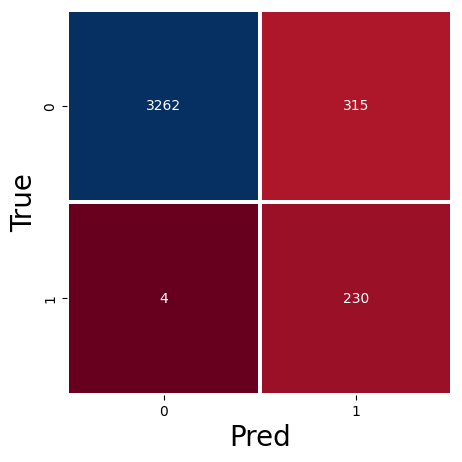

acc = 0.9162949357124115
precision = 0.42201834862385323
TPR = 0.9829059829059829
FAR = 0.08806262230919765
FRR = 0.017094017094017096


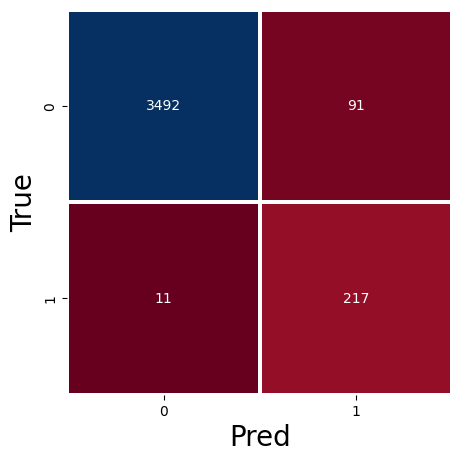

acc = 0.9732353712936237
precision = 0.7045454545454546
TPR = 0.9517543859649122
FAR = 0.025397711415015352
FRR = 0.04824561403508772


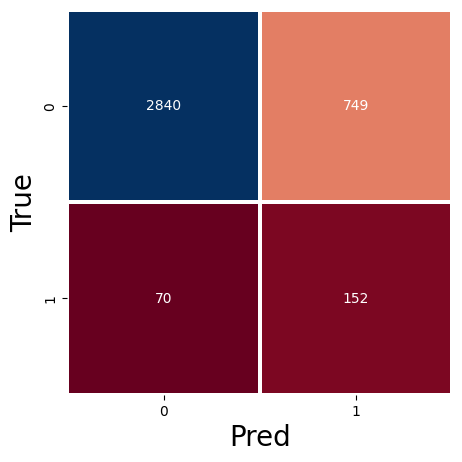

acc = 0.7850957753870376
precision = 0.16870144284128746
TPR = 0.6846846846846847
FAR = 0.20869322931178602
FRR = 0.3153153153153153


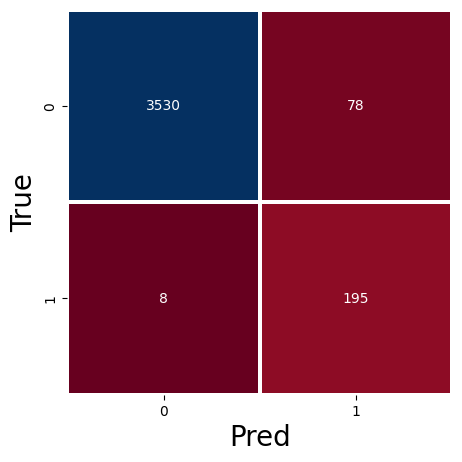

acc = 0.9774337444240356
precision = 0.7142857142857143
TPR = 0.9605911330049262
FAR = 0.021618625277161862
FRR = 0.03940886699507389


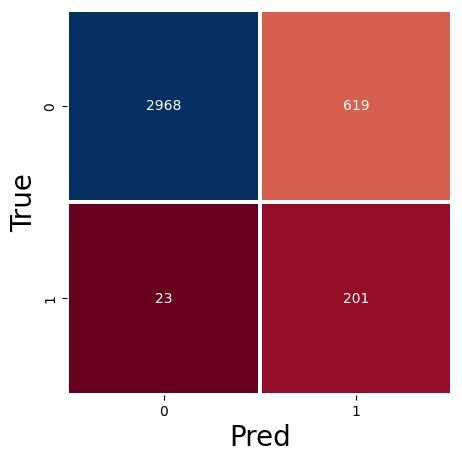

acc = 0.8315402781422199
precision = 0.2451219512195122
TPR = 0.8973214285714286
FAR = 0.1725676052411486
FRR = 0.10267857142857142


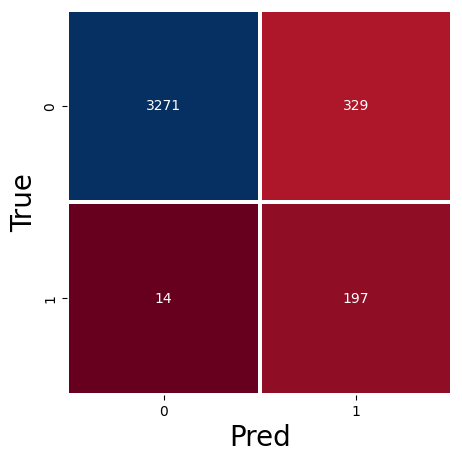

acc = 0.9099973760167935
precision = 0.3745247148288973
TPR = 0.933649289099526
FAR = 0.0913888888888889
FRR = 0.06635071090047394


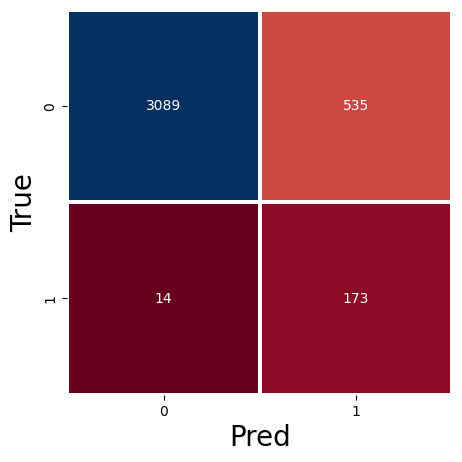

acc = 0.8559433219627395
precision = 0.2443502824858757
TPR = 0.9251336898395722
FAR = 0.14762693156732892
FRR = 0.0748663101604278


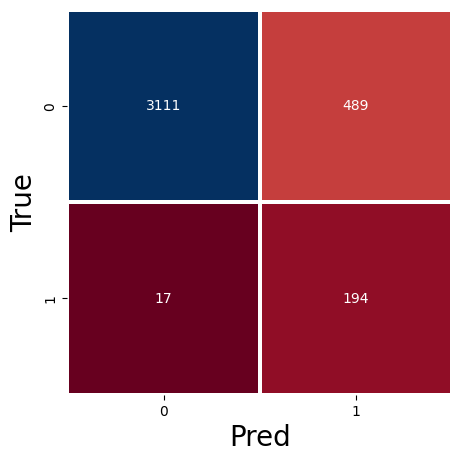

acc = 0.8672264497507216
precision = 0.2840409956076135
TPR = 0.919431279620853
FAR = 0.13583333333333333
FRR = 0.08056872037914692


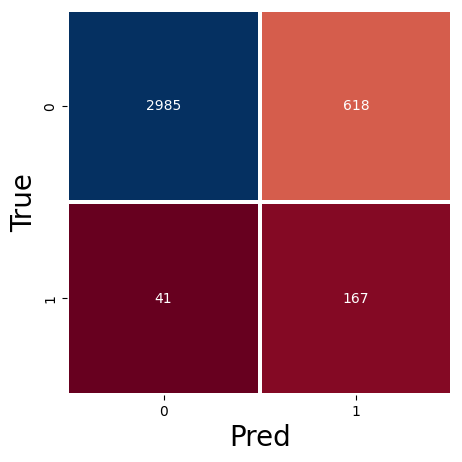

acc = 0.8270795066911572
precision = 0.21273885350318472
TPR = 0.8028846153846154
FAR = 0.17152373022481265
FRR = 0.1971153846153846


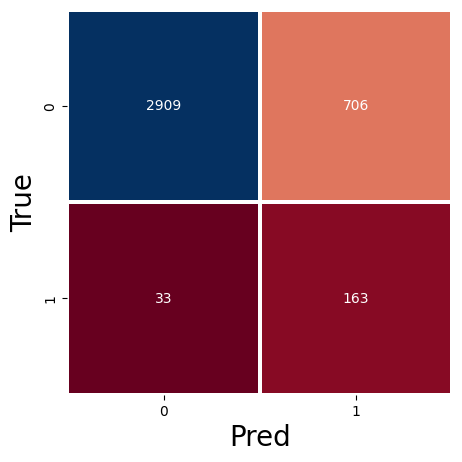

acc = 0.8060876410390974
precision = 0.18757192174913695
TPR = 0.8316326530612245
FAR = 0.19529737206085754
FRR = 0.1683673469387755


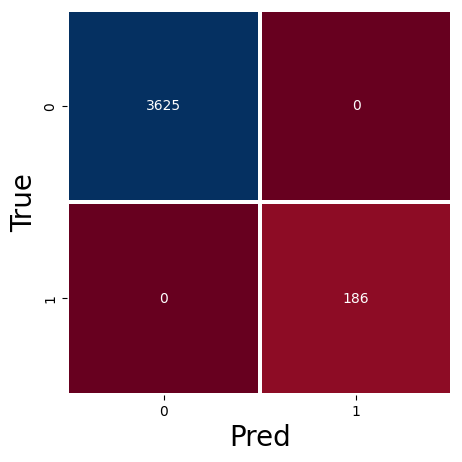

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


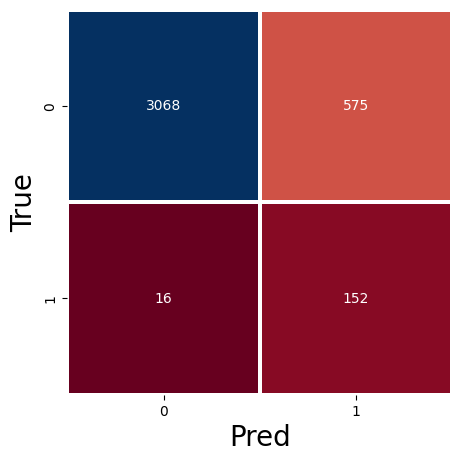

acc = 0.844922592495408
precision = 0.20907840440165062
TPR = 0.9047619047619048
FAR = 0.1578369475706835
FRR = 0.09523809523809523


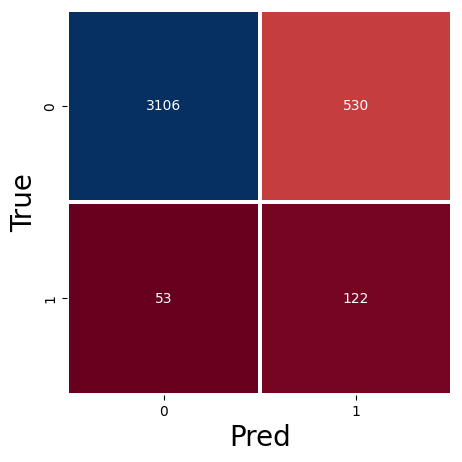

acc = 0.847021779060614
precision = 0.18711656441717792
TPR = 0.6971428571428572
FAR = 0.14576457645764576
FRR = 0.3028571428571429


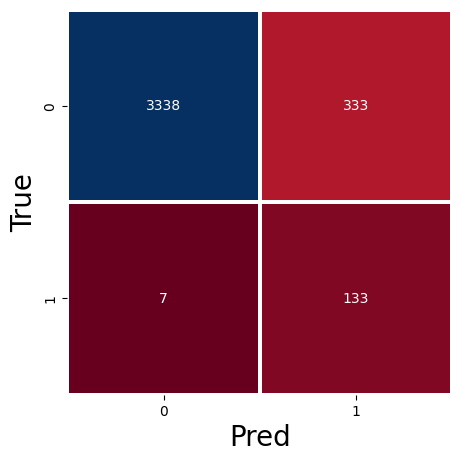

acc = 0.9107845709787458
precision = 0.2854077253218884
TPR = 0.95
FAR = 0.09071097793516752
FRR = 0.05


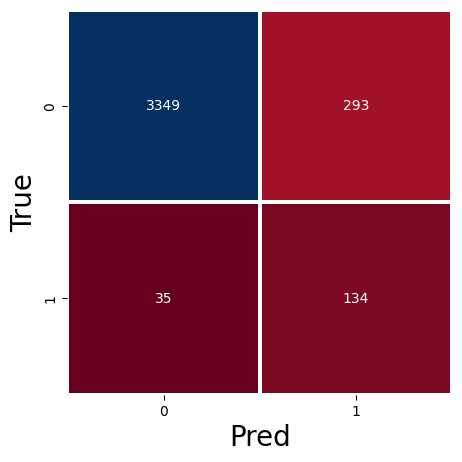

acc = 0.9139333508265547
precision = 0.31381733021077285
TPR = 0.7928994082840237
FAR = 0.08045030203185063
FRR = 0.20710059171597633


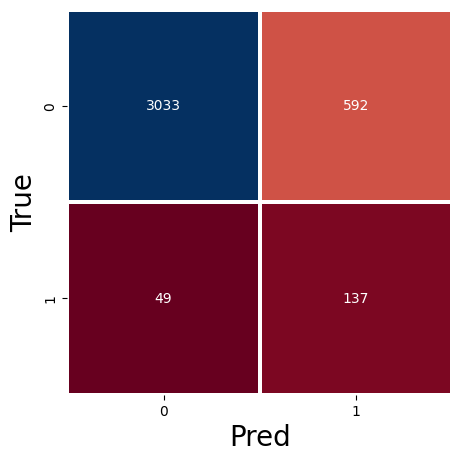

acc = 0.8318026764628706
precision = 0.18792866941015088
TPR = 0.7365591397849462
FAR = 0.16331034482758622
FRR = 0.26344086021505375


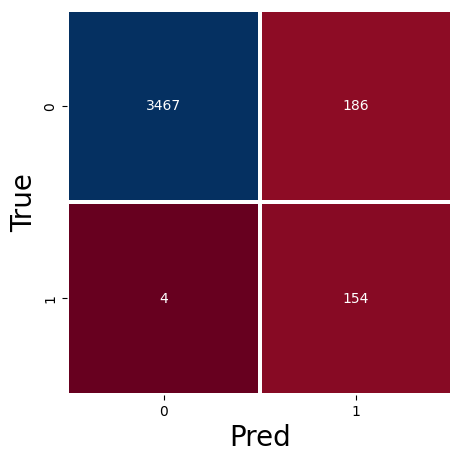

acc = 0.9501443190763579
precision = 0.45294117647058824
TPR = 0.9746835443037974
FAR = 0.050917054475773334
FRR = 0.02531645569620253
average acc = 0.8851938294963336
average precision = 0.3689869506353379
average TPR = 0.888711470686319
average FAR = 0.11519433986951495
average FRR = 0.11128852931368112
average EER = 0.050917054475773334


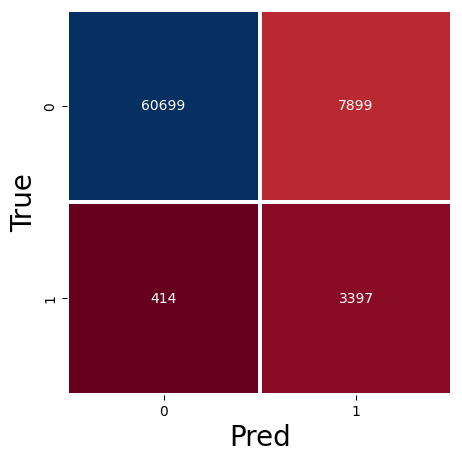

In [16]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        clf1 = svm.SVC(kernel='poly', C=10)
        clf2 = svm.SVC(kernel='rbf', C=10)
        voting_clf2 = VotingClassifier(estimators=[('svm1', clf1), ('svm2', clf2)], voting='hard')
        
        voting_clf2.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = voting_clf2.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


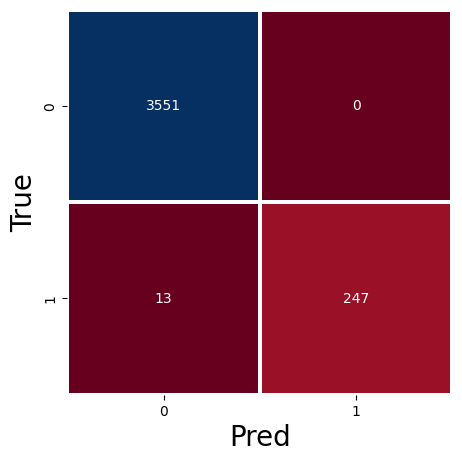

acc = 0.9965888218315403
precision = 1.0
TPR = 0.95
FAR = 0.0
FRR = 0.05


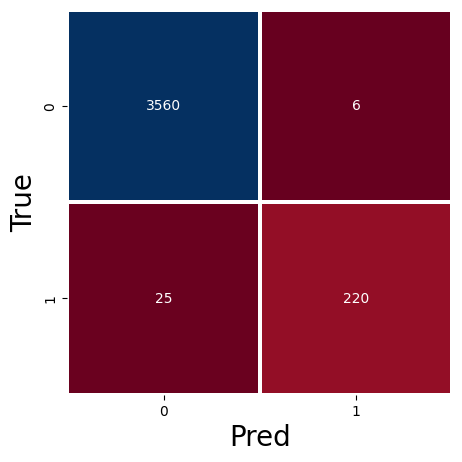

acc = 0.9918656520598268
precision = 0.9734513274336283
TPR = 0.8979591836734694
FAR = 0.0016825574873808188
FRR = 0.10204081632653061


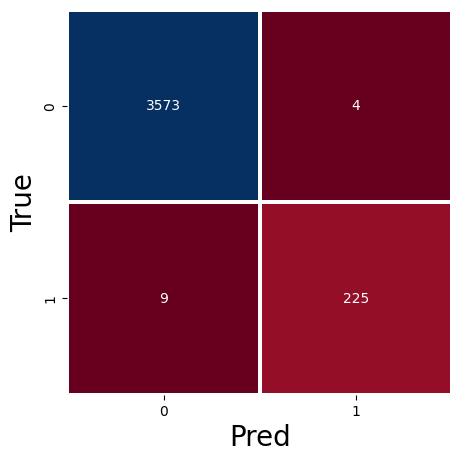

acc = 0.9965888218315403
precision = 0.982532751091703
TPR = 0.9615384615384616
FAR = 0.0011182555213866368
FRR = 0.038461538461538464


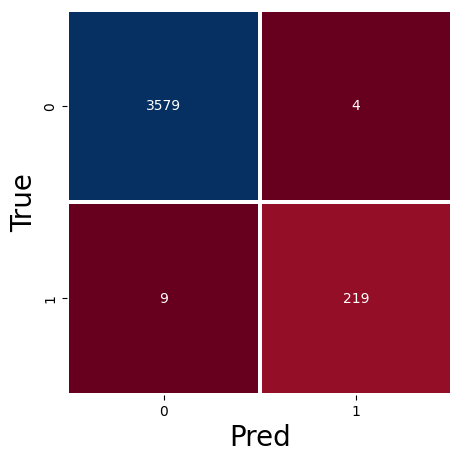

acc = 0.9965888218315403
precision = 0.9820627802690582
TPR = 0.9605263157894737
FAR = 0.0011163829193413341
FRR = 0.039473684210526314


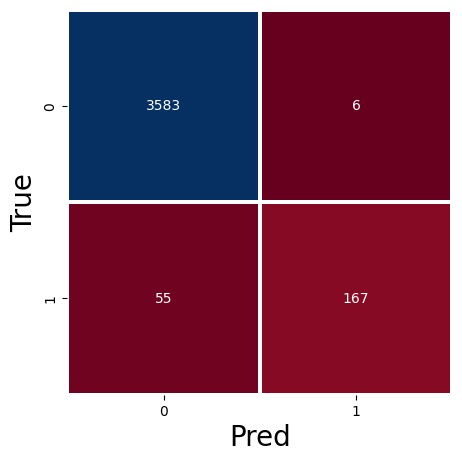

acc = 0.9839937024403044
precision = 0.9653179190751445
TPR = 0.7522522522522522
FAR = 0.0016717748676511562
FRR = 0.24774774774774774


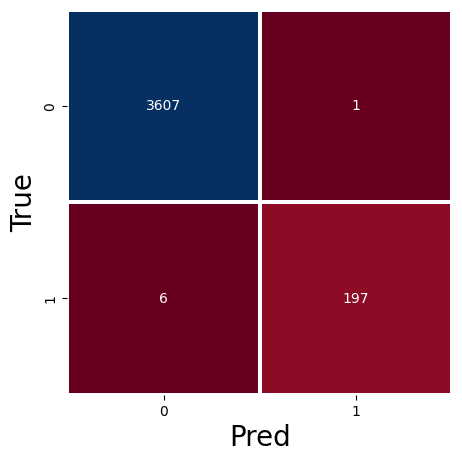

acc = 0.9981632117554448
precision = 0.9949494949494949
TPR = 0.9704433497536946
FAR = 0.0002771618625277162
FRR = 0.029556650246305417


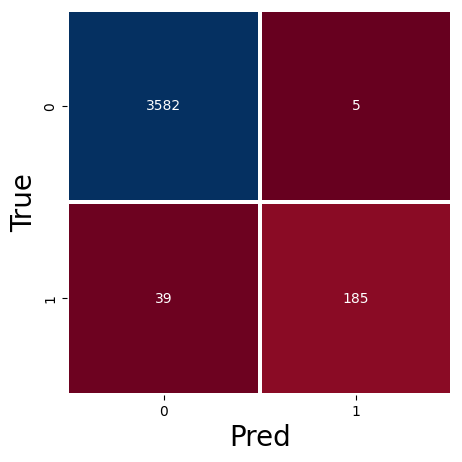

acc = 0.9884544738913671
precision = 0.9736842105263158
TPR = 0.8258928571428571
FAR = 0.0013939224979091162
FRR = 0.17410714285714285


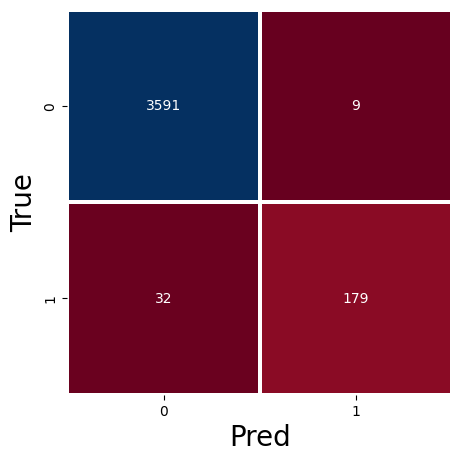

acc = 0.9892416688533193
precision = 0.9521276595744681
TPR = 0.8483412322274881
FAR = 0.0025
FRR = 0.15165876777251186


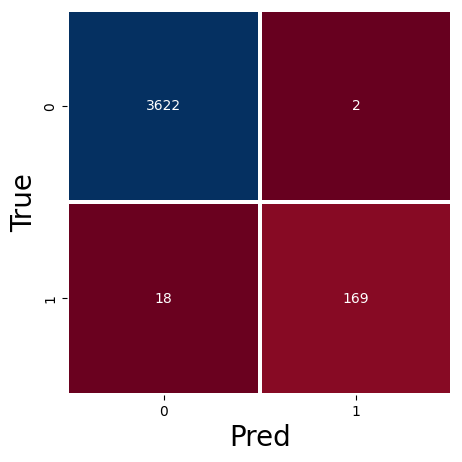

acc = 0.994752033586985
precision = 0.9883040935672515
TPR = 0.9037433155080213
FAR = 0.0005518763796909492
FRR = 0.0962566844919786


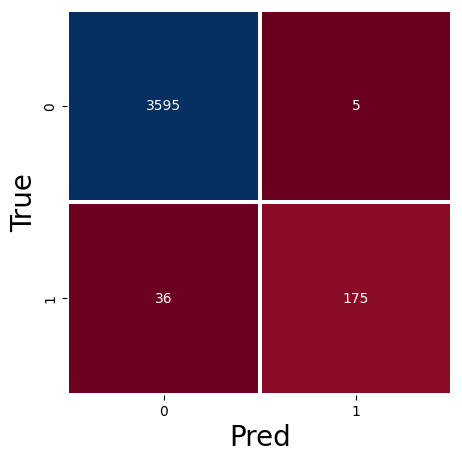

acc = 0.9892416688533193
precision = 0.9722222222222222
TPR = 0.8293838862559242
FAR = 0.001388888888888889
FRR = 0.17061611374407584


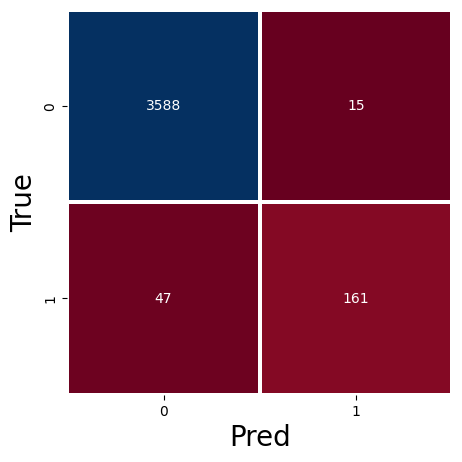

acc = 0.9837313041196536
precision = 0.9147727272727273
TPR = 0.7740384615384616
FAR = 0.004163197335553705
FRR = 0.22596153846153846


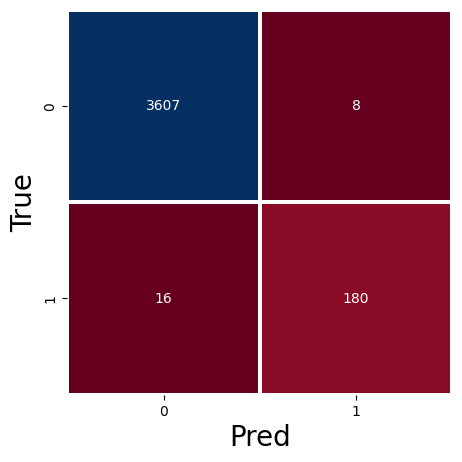

acc = 0.993702440304382
precision = 0.9574468085106383
TPR = 0.9183673469387755
FAR = 0.0022130013831258644
FRR = 0.08163265306122448


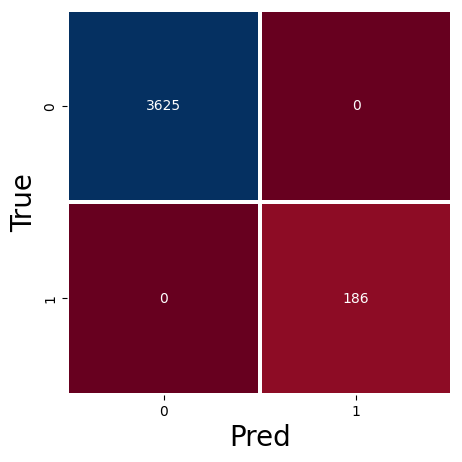

acc = 1.0
precision = 1.0
TPR = 1.0
FAR = 0.0
FRR = 0.0


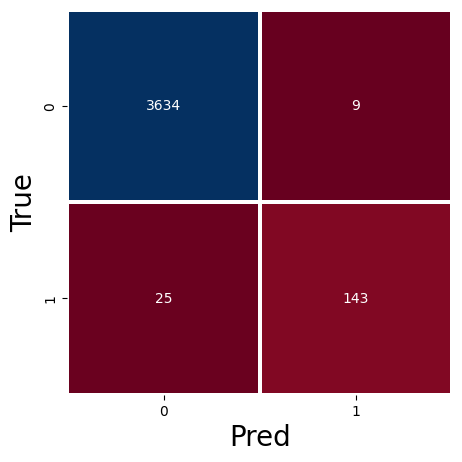

acc = 0.9910784570978746
precision = 0.9407894736842105
TPR = 0.8511904761904762
FAR = 0.0024704913532802636
FRR = 0.1488095238095238


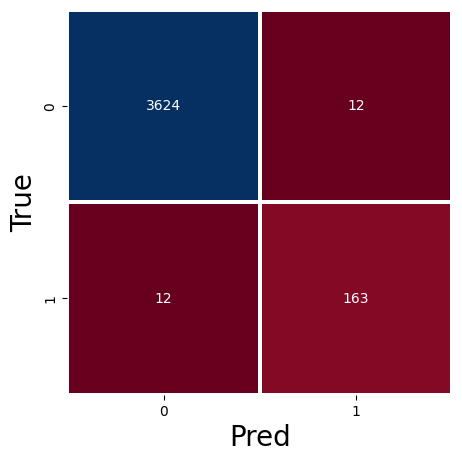

acc = 0.993702440304382
precision = 0.9314285714285714
TPR = 0.9314285714285714
FAR = 0.0033003300330033004
FRR = 0.06857142857142857


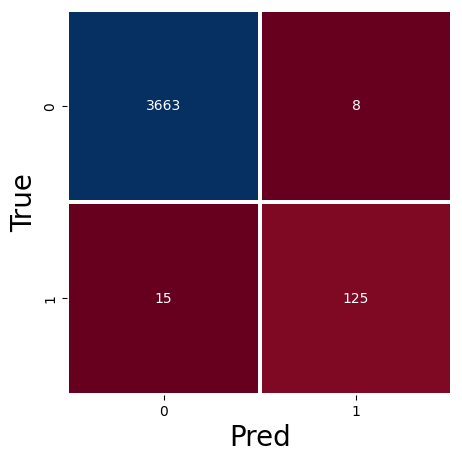

acc = 0.9939648386250328
precision = 0.9398496240601504
TPR = 0.8928571428571429
FAR = 0.002179242713157178
FRR = 0.10714285714285714


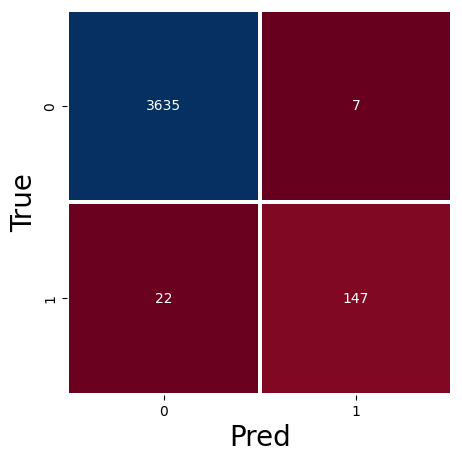

acc = 0.9923904487011284
precision = 0.9545454545454546
TPR = 0.8698224852071006
FAR = 0.0019220208676551346
FRR = 0.1301775147928994


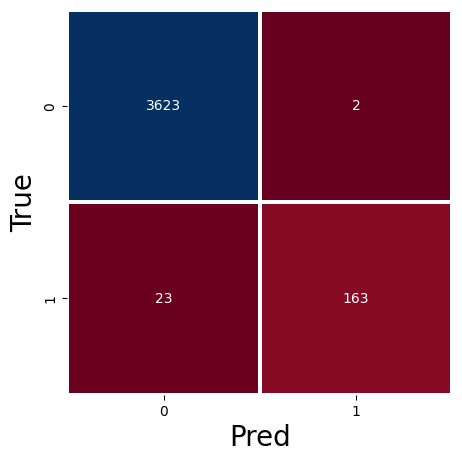

acc = 0.9934400419837313
precision = 0.9878787878787879
TPR = 0.8763440860215054
FAR = 0.0005517241379310345
FRR = 0.12365591397849462


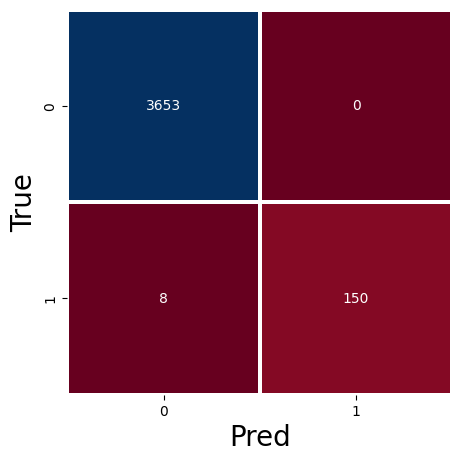

acc = 0.997900813434794
precision = 1.0
TPR = 0.9493670886075949
FAR = 0.0
FRR = 0.05063291139240506
average acc = 0.9929152453424299
average precision = 0.9690191529520961
average TPR = 0.892815605943751
average FAR = 0.001500043592025426
average FRR = 0.1071843940562489
average EER = 0.0


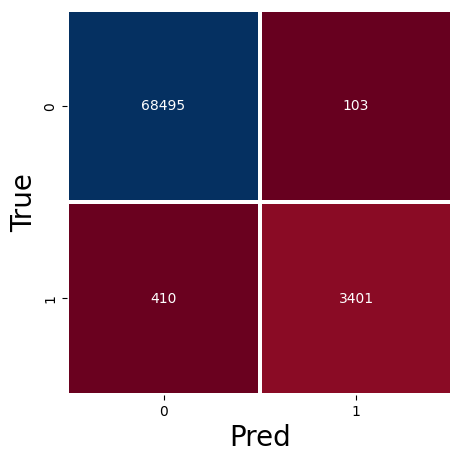

In [17]:
from sklearn.ensemble import VotingClassifier

precisionList = []
accList = []
tprList = []
farList = []
frrList = []
tnTotal, fpTotal, fnTotal, tpTotal = 0, 0, 0, 0

for df in dfList: 
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']
    predicted_targets = np.array([])
    actual_targets = np.array([])
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y) #stratify=y means to keep the same ratio of labels in test set as the training set
    k_fold = KFold(5, shuffle=True, random_state=42)
    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]    

        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int')) #only apply SMOTE on training dataset
    
        clf1 = DecisionTreeClassifier(criterion='entropy')
        clf2 = RandomForestClassifier(n_estimators=22)
        voting_clf3 = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2)], voting='hard')
        
        voting_clf3.fit(X_re,y_re)
    #model.fit(X_train, y_train.astype('int'))
        y_pred = voting_clf3.predict(X_test)
        predicted_targets = np.append(predicted_targets, y_pred)
        actual_targets = np.append(actual_targets, y_test)
    
    cm = confusion_matrix(actual_targets.astype('int'), predicted_targets)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    tnTotal += tn
    fpTotal += fp
    fnTotal += fn
    tpTotal += tp
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    tpr = tp/(tp+fn)
    far = fp/(fp+tn)
    frr = fn/(fn+tp)
    
    accList.append(accuracy)
    precisionList.append(precision)
    tprList.append(tpr)
    farList.append(far)
    frrList.append(frr)
    
    print("acc = "+str(accuracy))
    print("precision = "+str(precision))
    print("TPR = "+str(tpr))
    print("FAR = "+str(far))
    print("FRR = "+str(frr))
    
eval(accList, precisionList, tprList, farList, frrList, actual_targets.astype('int'), predicted_targets)
plt.figure(figsize=(12,5))
sns.heatmap(np.array([[tnTotal, fpTotal], [fnTotal, tpTotal]]),square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()


In [ ]:
print(classification_report(y_test.astype('int'),y_pred))

In [ ]:
import pickle 
pickle.dump(model,open('model.pkl','wb'))